# Parkinson's Disease Detection - Project by Mrityunjay Abhijeet Bhanja

Parkinson’s Disease (PD) is a degenerative neurological disorder marked by decreased dopamine levels in the brain. It manifests itself through a deterioration of movement, including the presence of tremors and stiffness. There is commonly a marked effect on speech, including dysarthria (difficulty articulating sounds), hypophonia (lowered volume), and monotone (reduced pitch range). Additionally, cognitive impairments and changes in mood can occur, and risk of dementia is increased.

Traditional diagnosis of Parkinson’s Disease involves a clinician taking a neurological history of the patient and observing motor skills in various situations. Since there is no definitive laboratory test to diagnose PD, diagnosis is often difficult, particularly in the early stages when motor effects are not yet severe. Monitoring progression of the disease over time requires repeated clinic visits by the patient. An effective screening process, particularly one that doesn’t require a clinic visit, would be beneficial. Since PD patients exhibit characteristic vocal features, voice recordings are a useful and non-invasive tool for diagnosis. If machine learning algorithms could be applied to a voice recording dataset to accurately diagnosis PD, this would be an effective screening step prior to an appointment with a clinician

Dataset: https://archive.ics.uci.edu/ml/datasets/parkinsons#:~:text=This%20dataset%20is%20composed%20of,(%22name%22%20column).

# Independent Variable

ASCII subject name and recording number:
- __name__

Vocal Fundamental Frequency:
- __MDVP:Fo(Hz)__ - Average
- __MDVP:Fhi(Hz)__ - Maximum 
- __MDVP:Flo(Hz)__ - Minimum

Measures of variation in fundamental frequency:
- __MDVP:Jitter(%)__
- __MDVP:Jitter(Abs)__
- __MDVP:RAP__
- __MDVP:PPQ__
- __Jitter:DDP__<br>

Measures of variation in amplitude:
- __MDVP:Shimmer__
- __MDVP:Shimmer(dB)__
- __Shimmer:APQ3__
- __Shimmer:APQ5__
- __MDVP:APQ__ 
- __Shimmer:DDA__


Two measures of ratio of noise to tonal components in the voice:
- __NHR__
- __HNR__


Two nonlinear dynamical complexity measures:
- __RPDE__
- __D2__


Signal fractal scaling exponent:
__DFA__

Three nonlinear measures of fundamental frequency variation:
- __spread1__
- __spread2__
- __PPE__

# Target Variable:
__status__ - Health status of the subject (one) - Parkinson's, (zero) - healthy <br>

In [24]:
#importing necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
from scipy import stats
from scipy.stats import pearsonr
from sklearn import metrics

from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, roc_curve, auc, classification_report, recall_score, precision_score, f1_score
from sklearn.model_selection import cross_val_score


import pandas_profiling
from xgboost import XGBClassifier

import warnings
warnings.filterwarnings("ignore")

In [25]:
#reading the data

df = pd.read_csv("Data - Parkinsons")
df.head()

name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0  phon_R01_S01_1      119.992       157.302        74.997         0.00784   
1  phon_R01_S01_2      122.400       148.650       113.819         0.00968   
2  phon_R01_S01_3      116.682       131.111       111.555         0.01050   
3  phon_R01_S01_4      116.676       137.871       111.366         0.00997   
4  phon_R01_S01_5      116.014       141.781       110.655         0.01284   

   MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  ...  \
0           0.00007   0.00370   0.00554     0.01109       0.04374  ...   
1           0.00008   0.00465   0.00696     0.01394       0.06134  ...   
2           0.00009   0.00544   0.00781     0.01633       0.05233  ...   
3           0.00009   0.00502   0.00698     0.01505       0.05492  ...   
4           0.00011   0.00655   0.00908     0.01966       0.06425  ...   

   Shimmer:DDA      NHR     HNR  status      RPDE       DFA   spread1  \
0      0.06545  0.02211  21.033       1  0.414783  0.815285 -4.813031   
1      0.09403  0.01929  19.085       1  0.458359  0.819521 -4.075192   
2      0.08270  0.01309  20.651       1  0.429895  0.825288 -4.443179   
3      0.08771  0.01353  20.644       1  0.434969  0.819235 -4.117501   
4      0.10470  0.01767  19.649       1  0.417356  0.823484 -3.747787   

    spread2        D2       PPE  
0  0.266482  2.301442  0.284654  
1  0.335590  2.486855  0.368674  
2  0.311173  2.342259  0.332634  
3  0.334147  2.405554  0.368975  
4  0.234513  2.332180  0.410335  

[5 rows x 24 columns]

In [26]:
df.shape

(195, 24)

- The dataset has 24 columns and 195 rows.

In [27]:
df.dtypes

name                 object
MDVP:Fo(Hz)         float64
MDVP:Fhi(Hz)        float64
MDVP:Flo(Hz)        float64
MDVP:Jitter(%)      float64
MDVP:Jitter(Abs)    float64
MDVP:RAP            float64
MDVP:PPQ            float64
Jitter:DDP          float64
MDVP:Shimmer        float64
MDVP:Shimmer(dB)    float64
Shimmer:APQ3        float64
Shimmer:APQ5        float64
MDVP:APQ            float64
Shimmer:DDA         float64
NHR                 float64
HNR                 float64
status                int64
RPDE                float64
DFA                 float64
spread1             float64
spread2             float64
D2                  float64
PPE                 float64
dtype: object

In [28]:
df.astype({'status': 'category'}).dtypes

name                  object
MDVP:Fo(Hz)          float64
MDVP:Fhi(Hz)         float64
MDVP:Flo(Hz)         float64
MDVP:Jitter(%)       float64
MDVP:Jitter(Abs)     float64
MDVP:RAP             float64
MDVP:PPQ             float64
Jitter:DDP           float64
MDVP:Shimmer         float64
MDVP:Shimmer(dB)     float64
Shimmer:APQ3         float64
Shimmer:APQ5         float64
MDVP:APQ             float64
Shimmer:DDA          float64
NHR                  float64
HNR                  float64
status              category
RPDE                 float64
DFA                  float64
spread1              float64
spread2              float64
D2                   float64
PPE                  float64
dtype: object

- The target variable is "status", which is the indicator if a person has Parkinson's disease or not
- From all the independent variables, name is the only variable of type "object". Rest all are numeric in nature.

In [29]:
df.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [30]:
df.isna().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

### There are no missing or null values.

In [31]:
df.describe().T

count        mean        std         min         25%  \
MDVP:Fo(Hz)       195.0  154.228641  41.390065   88.333000  117.572000   
MDVP:Fhi(Hz)      195.0  197.104918  91.491548  102.145000  134.862500   
MDVP:Flo(Hz)      195.0  116.324631  43.521413   65.476000   84.291000   
MDVP:Jitter(%)    195.0    0.006220   0.004848    0.001680    0.003460   
MDVP:Jitter(Abs)  195.0    0.000044   0.000035    0.000007    0.000020   
MDVP:RAP          195.0    0.003306   0.002968    0.000680    0.001660   
MDVP:PPQ          195.0    0.003446   0.002759    0.000920    0.001860   
Jitter:DDP        195.0    0.009920   0.008903    0.002040    0.004985   
MDVP:Shimmer      195.0    0.029709   0.018857    0.009540    0.016505   
MDVP:Shimmer(dB)  195.0    0.282251   0.194877    0.085000    0.148500   
Shimmer:APQ3      195.0    0.015664   0.010153    0.004550    0.008245   
Shimmer:APQ5      195.0    0.017878   0.012024    0.005700    0.009580   
MDVP:APQ          195.0    0.024081   0.016947    0.007190    0.013080   
Shimmer:DDA       195.0    0.046993   0.030459    0.013640    0.024735   
NHR               195.0    0.024847   0.040418    0.000650    0.005925   
HNR               195.0   21.885974   4.425764    8.441000   19.198000   
status            195.0    0.753846   0.431878    0.000000    1.000000   
RPDE              195.0    0.498536   0.103942    0.256570    0.421306   
DFA               195.0    0.718099   0.055336    0.574282    0.674758   
spread1           195.0   -5.684397   1.090208   -7.964984   -6.450096   
spread2           195.0    0.226510   0.083406    0.006274    0.174351   
D2                195.0    2.381826   0.382799    1.423287    2.099125   
PPE               195.0    0.206552   0.090119    0.044539    0.137451   

                         50%         75%         max  
MDVP:Fo(Hz)       148.790000  182.769000  260.105000  
MDVP:Fhi(Hz)      175.829000  224.205500  592.030000  
MDVP:Flo(Hz)      104.315000  140.018500  239.170000  
MDVP:Jitter(%)      0.004940    0.007365    0.033160  
MDVP:Jitter(Abs)    0.000030    0.000060    0.000260  
MDVP:RAP            0.002500    0.003835    0.021440  
MDVP:PPQ            0.002690    0.003955    0.019580  
Jitter:DDP          0.007490    0.011505    0.064330  
MDVP:Shimmer        0.022970    0.037885    0.119080  
MDVP:Shimmer(dB)    0.221000    0.350000    1.302000  
Shimmer:APQ3        0.012790    0.020265    0.056470  
Shimmer:APQ5        0.013470    0.022380    0.079400  
MDVP:APQ            0.018260    0.029400    0.137780  
Shimmer:DDA         0.038360    0.060795    0.169420  
NHR                 0.011660    0.025640    0.314820  
HNR                22.085000   25.075500   33.047000  
status              1.000000    1.000000    1.000000  
RPDE                0.495954    0.587562    0.685151  
DFA                 0.722254    0.761881    0.825288  
spread1            -5.720868   -5.046192   -2.434031  
spread2             0.218885    0.279234    0.450493  
D2                  2.361532    2.636456    3.671155  
PPE                 0.194052    0.252980    0.527367

The mean and median of most of the attributes seem to differ a lot by margin. This will determine the skewness of each column. We will take a look at each of them below.<br>
All the values in spread1 are negative. We will scale them later for better model building.

### Analysing output class

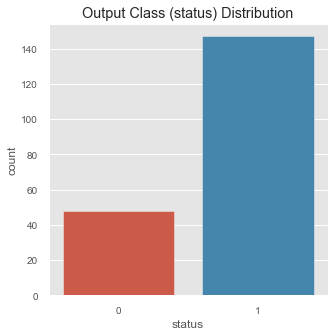

Number of positive cases: 147 (75.38%)
Number of negative cases: 48 (24.62%)


In [32]:
plt.figure(figsize=(5,5))
plt.style.use("ggplot")
plt.title("Output Class (status) Distribution")
plt.xticks([0,1])
sns.countplot(df["status"]);
plt.show();


n_true = len(df.loc[df["status"] == True])
n_false = len(df.loc[df["status"] == False])
print("Number of positive cases: {0} ({1:2.2f}%)".format(n_true, (n_true / (n_true + n_false)) * 100 ))
print("Number of negative cases: {0} ({1:2.2f}%)".format(n_false, (n_false / (n_true + n_false)) * 100))

### We've got a __3:1__ ratio of output values

In [33]:
for col in df.columns:
    print(col)

name
MDVP:Fo(Hz)
MDVP:Fhi(Hz)
MDVP:Flo(Hz)
MDVP:Jitter(%)
MDVP:Jitter(Abs)
MDVP:RAP
MDVP:PPQ
Jitter:DDP
MDVP:Shimmer
MDVP:Shimmer(dB)
Shimmer:APQ3
Shimmer:APQ5
MDVP:APQ
Shimmer:DDA
NHR
HNR
status
RPDE
DFA
spread1
spread2
D2
PPE


## The attribute "name" is irrelevant to our problem. The recording name will not provide any value to our model. It's only work is to act as a unique ID for all records, and hence, we'll be dropping the columns from our dataframe.

In [34]:
df = df.drop("name", axis=1)

In [35]:
df.head()

MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  MDVP:Jitter(Abs)  \
0      119.992       157.302        74.997         0.00784           0.00007   
1      122.400       148.650       113.819         0.00968           0.00008   
2      116.682       131.111       111.555         0.01050           0.00009   
3      116.676       137.871       111.366         0.00997           0.00009   
4      116.014       141.781       110.655         0.01284           0.00011   

   MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  MDVP:Shimmer(dB)  ...  \
0   0.00370   0.00554     0.01109       0.04374             0.426  ...   
1   0.00465   0.00696     0.01394       0.06134             0.626  ...   
2   0.00544   0.00781     0.01633       0.05233             0.482  ...   
3   0.00502   0.00698     0.01505       0.05492             0.517  ...   
4   0.00655   0.00908     0.01966       0.06425             0.584  ...   

   Shimmer:DDA      NHR     HNR  status      RPDE       DFA   spread1  \
0      0.06545  0.02211  21.033       1  0.414783  0.815285 -4.813031   
1      0.09403  0.01929  19.085       1  0.458359  0.819521 -4.075192   
2      0.08270  0.01309  20.651       1  0.429895  0.825288 -4.443179   
3      0.08771  0.01353  20.644       1  0.434969  0.819235 -4.117501   
4      0.10470  0.01767  19.649       1  0.417356  0.823484 -3.747787   

    spread2        D2       PPE  
0  0.266482  2.301442  0.284654  
1  0.335590  2.486855  0.368674  
2  0.311173  2.342259  0.332634  
3  0.334147  2.405554  0.368975  
4  0.234513  2.332180  0.410335  

[5 rows x 23 columns]

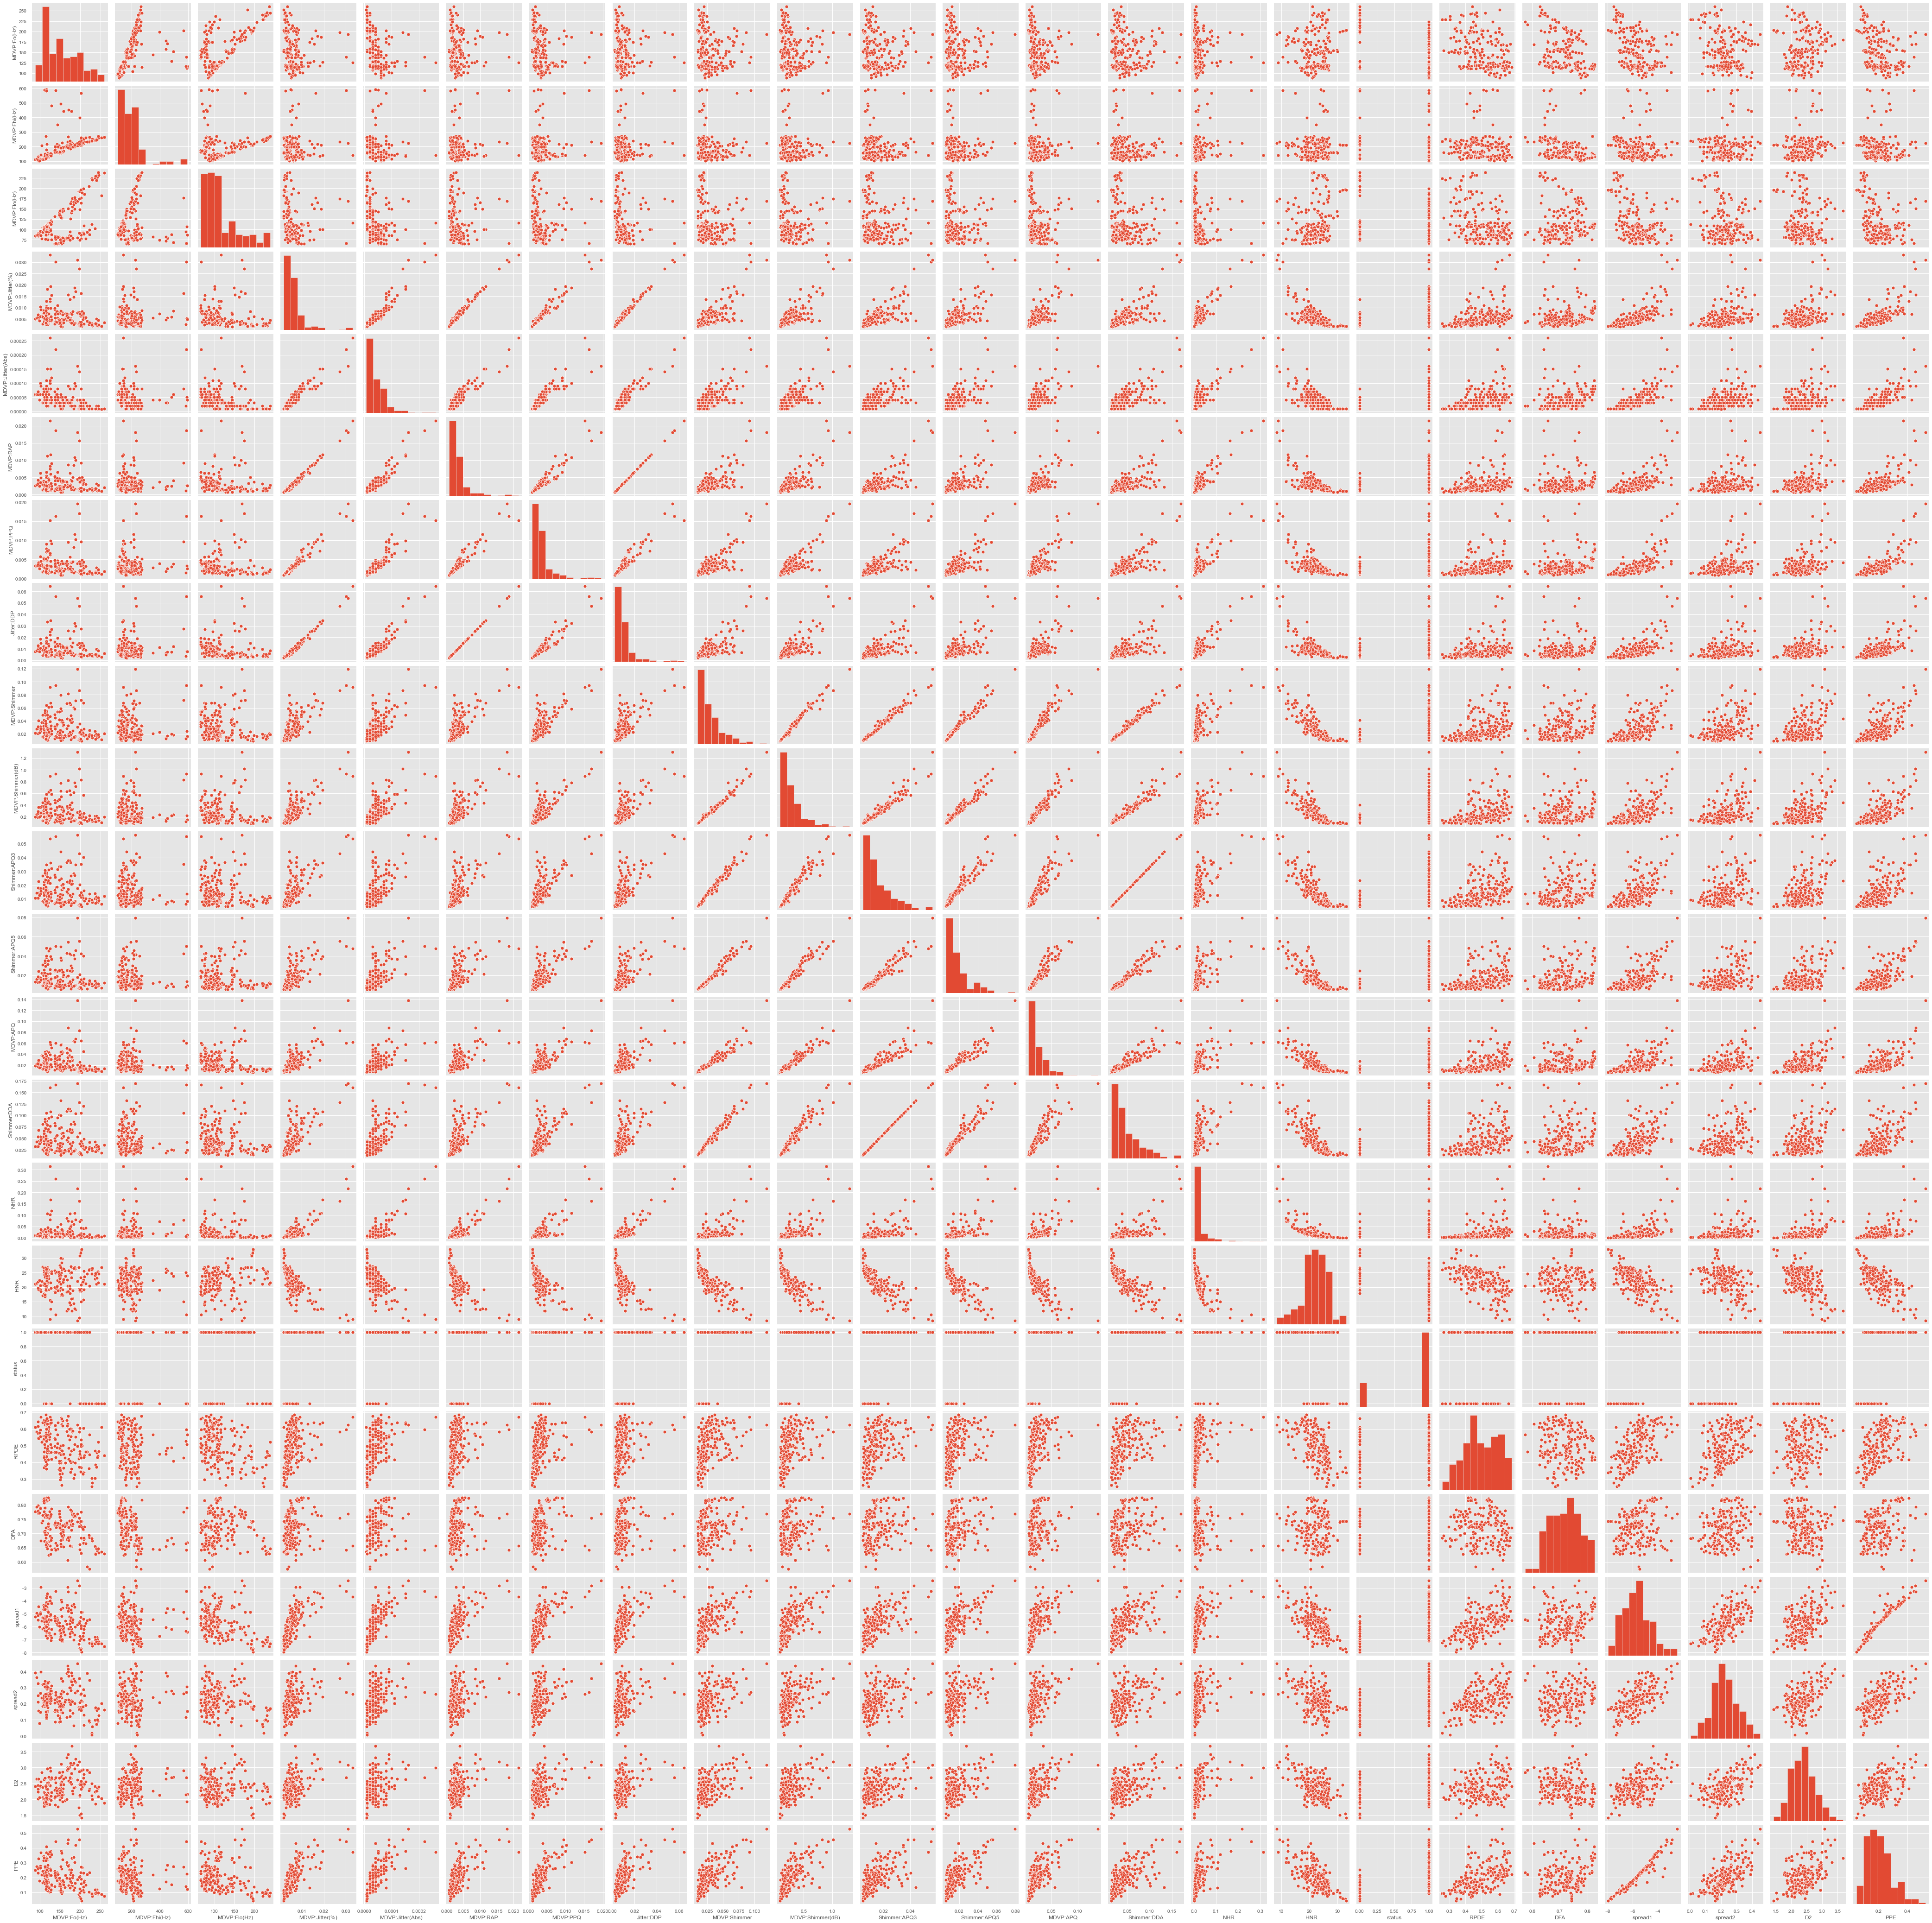

In [36]:
sns.pairplot(df)

## Plotting all numerical attributes

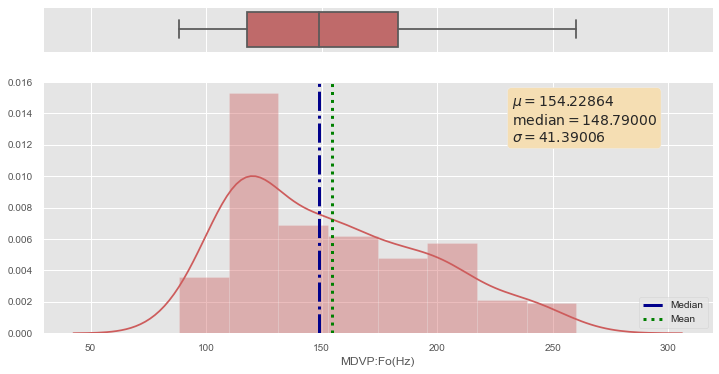

Skewness of MDVP:Fo(Hz) is: 0.587, hence it is right skewed
------------------------------------------------------------------------


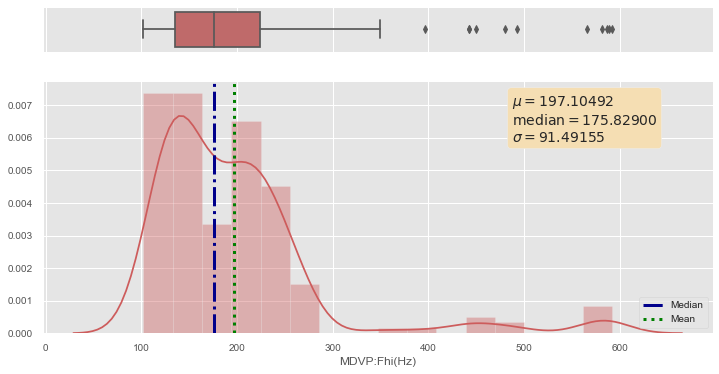

Skewness of MDVP:Fhi(Hz) is: 2.523, hence it is right skewed
------------------------------------------------------------------------


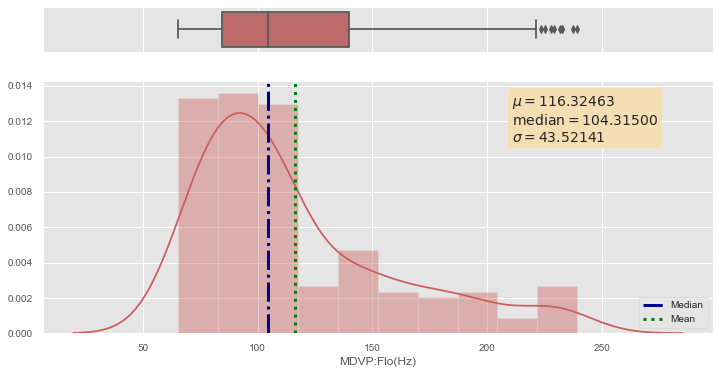

Skewness of MDVP:Flo(Hz) is: 1.208, hence it is right skewed
------------------------------------------------------------------------


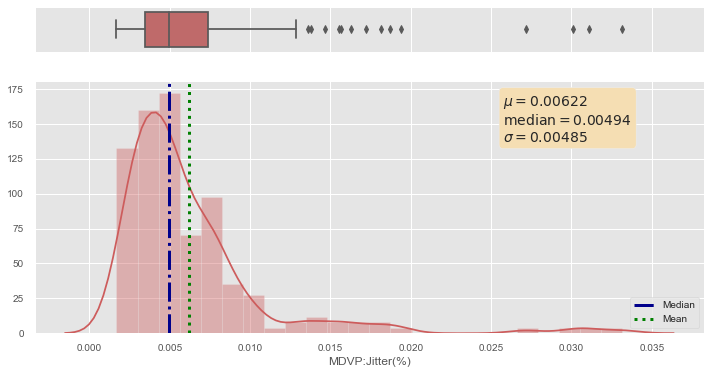

Skewness of MDVP:Jitter(%) is: 3.061, hence it is right skewed
------------------------------------------------------------------------


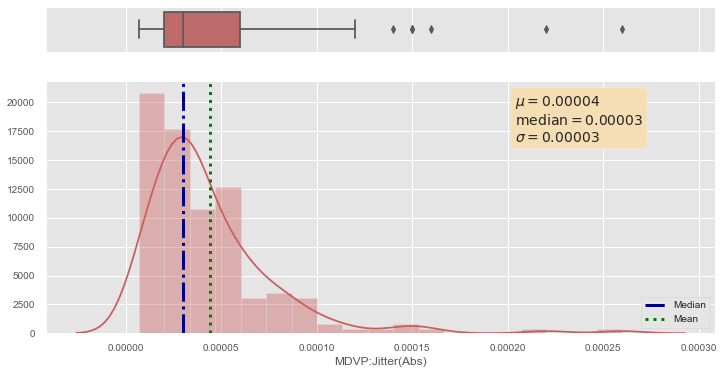

Skewness of MDVP:Jitter(Abs) is: 2.629, hence it is right skewed
------------------------------------------------------------------------


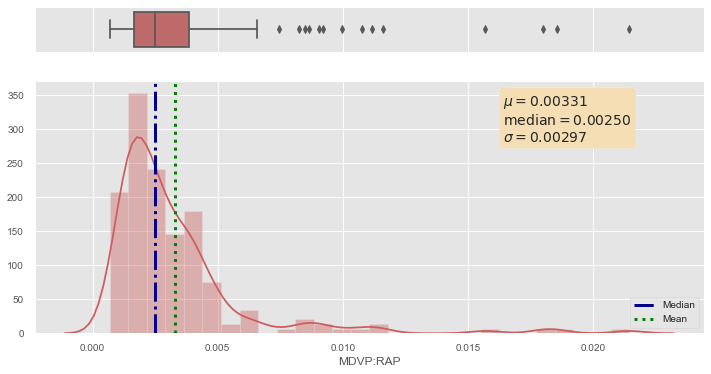

Skewness of MDVP:RAP is: 3.335, hence it is right skewed
------------------------------------------------------------------------


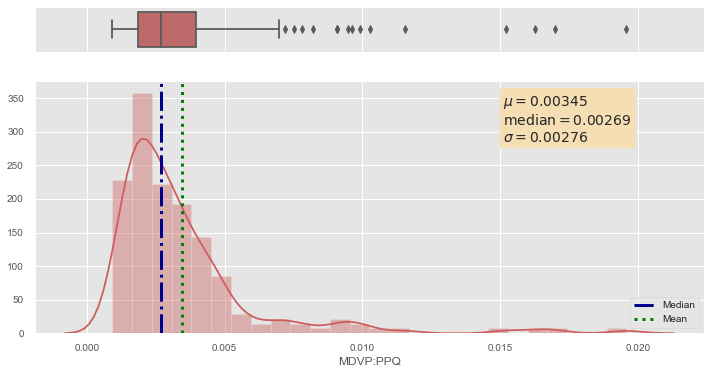

Skewness of MDVP:PPQ is: 3.05, hence it is right skewed
------------------------------------------------------------------------


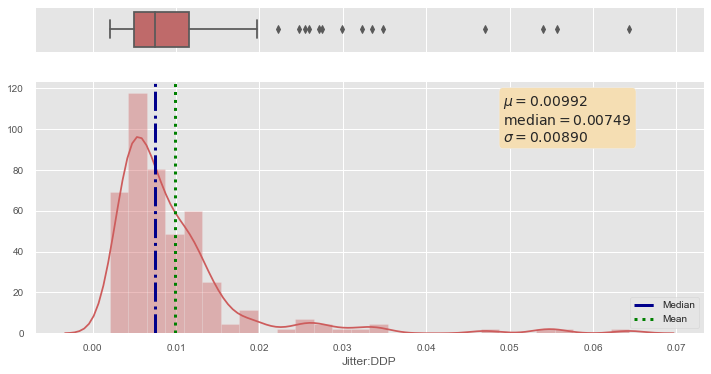

Skewness of Jitter:DDP is: 3.336, hence it is right skewed
------------------------------------------------------------------------


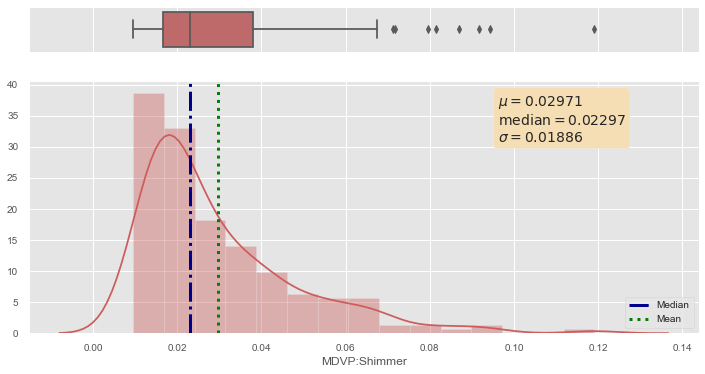

Skewness of MDVP:Shimmer is: 1.654, hence it is right skewed
------------------------------------------------------------------------


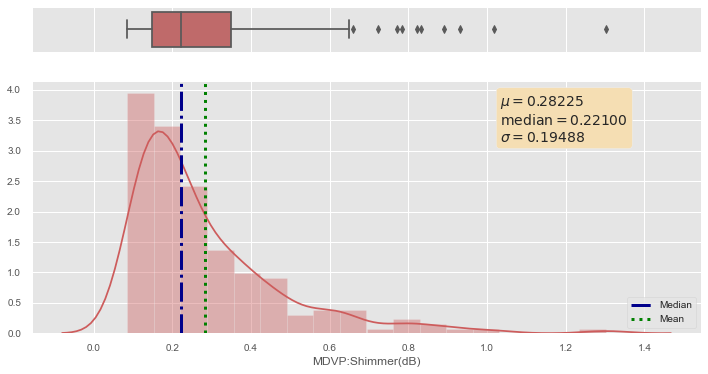

Skewness of MDVP:Shimmer(dB) is: 1.984, hence it is right skewed
------------------------------------------------------------------------


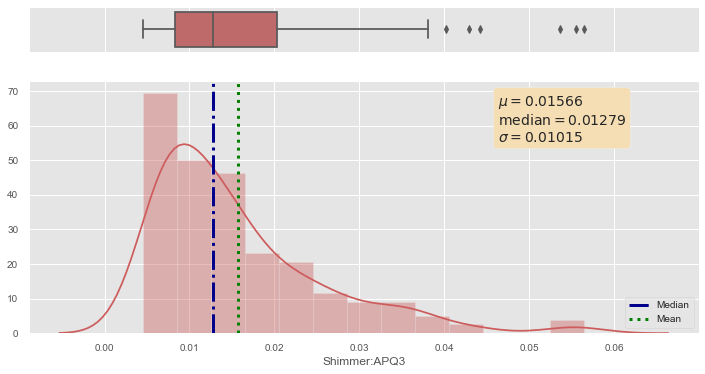

Skewness of Shimmer:APQ3 is: 1.568, hence it is right skewed
------------------------------------------------------------------------


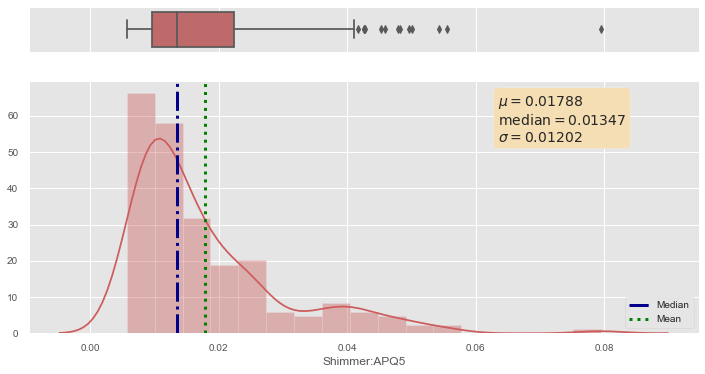

Skewness of Shimmer:APQ5 is: 1.785, hence it is right skewed
------------------------------------------------------------------------


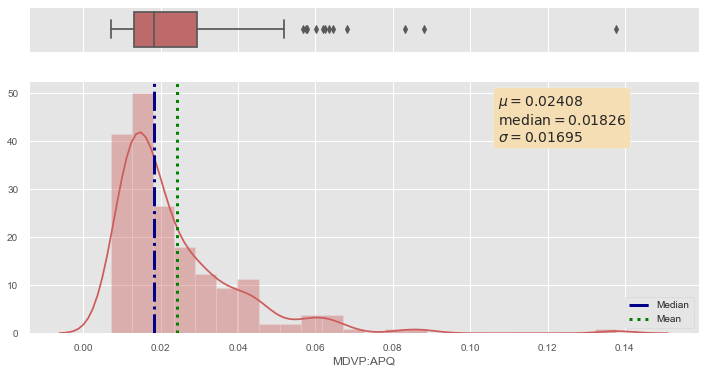

Skewness of MDVP:APQ is: 2.598, hence it is right skewed
------------------------------------------------------------------------


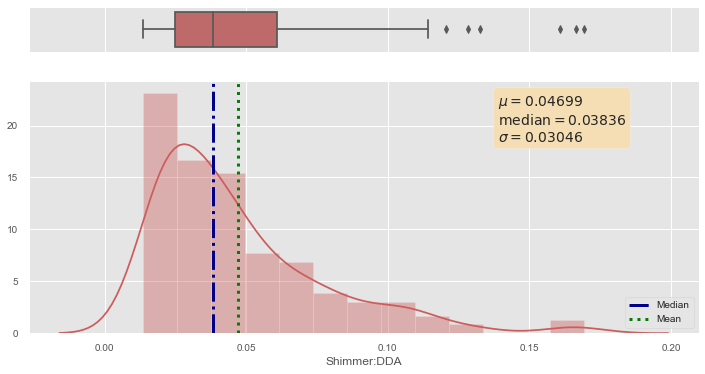

Skewness of Shimmer:DDA is: 1.568, hence it is right skewed
------------------------------------------------------------------------


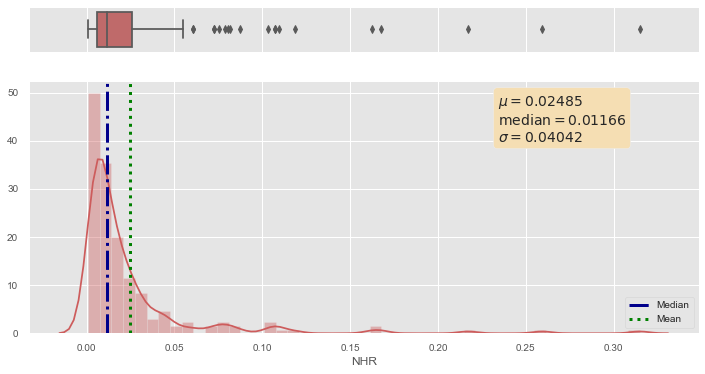

Skewness of NHR is: 4.188, hence it is right skewed
------------------------------------------------------------------------


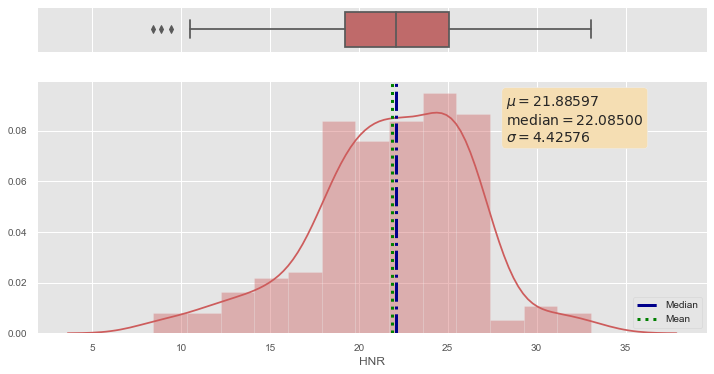

Skewness of HNR is: -0.51, hence it is left skewed
------------------------------------------------------------------------


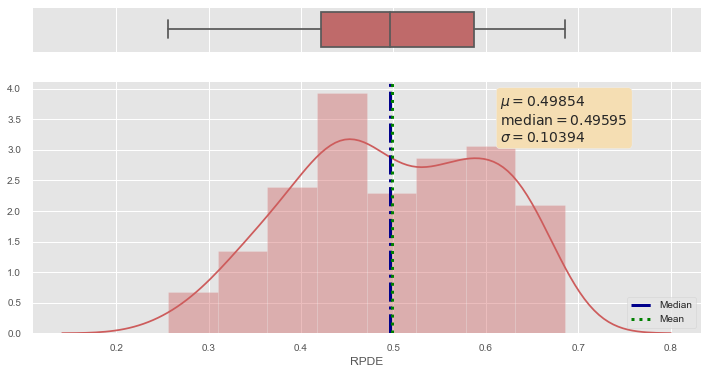

Skewness of RPDE is: -0.142, hence the distribution is fairly normal.
------------------------------------------------------------------------


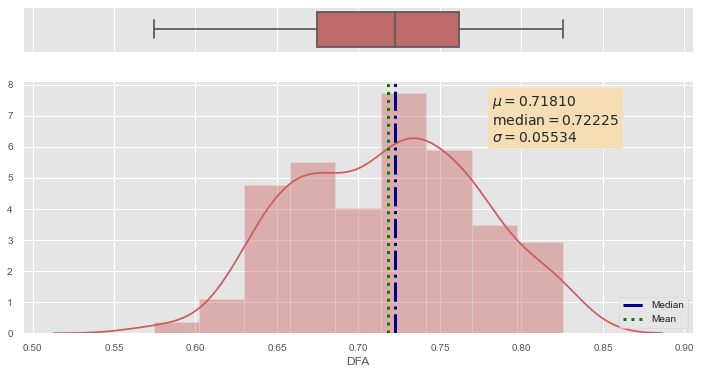

Skewness of DFA is: -0.033, hence the distribution is fairly normal.
------------------------------------------------------------------------


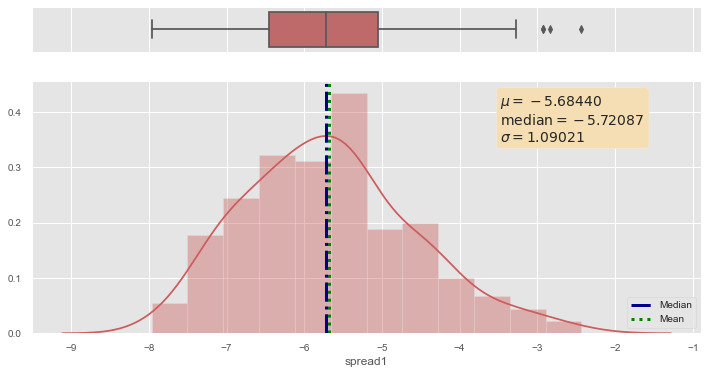

Skewness of spread1 is: 0.429, hence the distribution is fairly normal.
------------------------------------------------------------------------


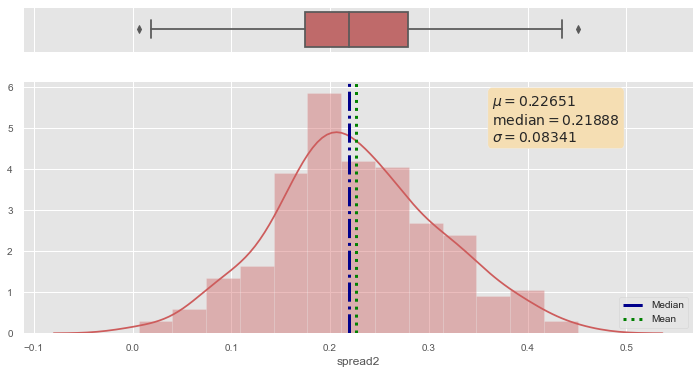

Skewness of spread2 is: 0.143, hence the distribution is fairly normal.
------------------------------------------------------------------------


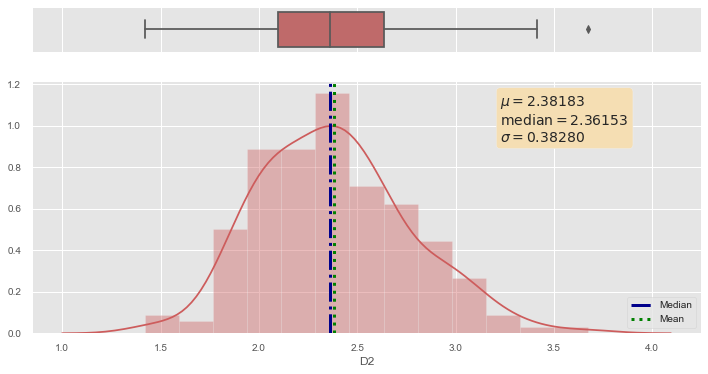

Skewness of D2 is: 0.427, hence the distribution is fairly normal.
------------------------------------------------------------------------


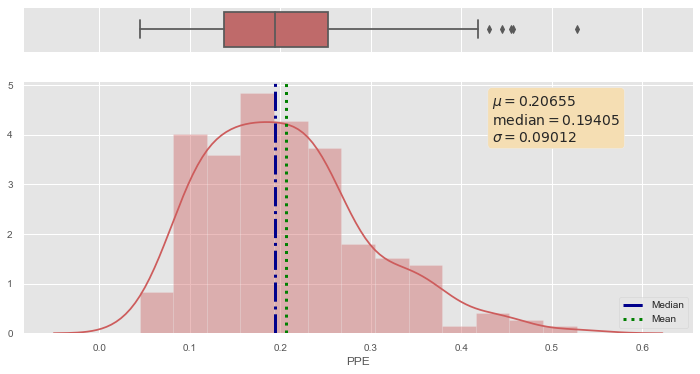

Skewness of PPE is: 0.791, hence it is right skewed
------------------------------------------------------------------------


In [37]:
#loop to plot all numerical attributes
for i, col in enumerate(df.drop("status",axis=1).columns):
    plt.style.use('seaborn-pastel')    
    # create a subplot with 2 windows: one boxplot, one histogram
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)}, figsize=(12,6))
    sns.boxplot(df[col], ax=ax_box, color="indianred");
    sns.distplot(df[col], ax=ax_hist, color="indianred");
    
    #vertical lines for median and mode
    plt.axvline(np.median(df[col]),color='darkblue', linestyle='-.',label="Median", lw=3)
    plt.axvline(np.mean(df[col]),color='green',  linestyle=':',label="Mean", lw=3)   
    
    ax_box.set(xlabel='')
    ax_hist.set(xlabel=col)
    plt.legend(loc="lower right")
    
    x=df[col]
    mu = x.mean()
    median = np.median(x)
    sigma = x.std()
    textstr = '\n'.join((r'$\mu=%.5f$' % (mu, ), 
                         r'$\mathrm{median}=%.5f$' % (median, ), 
                         r'$\sigma=%.5f$' % (sigma, )))


    # place a text box in upper left in axes coords
    props = dict(boxstyle='round', facecolor='wheat', alpha=1)
    ax_hist.text(0.70, 0.95, textstr, transform=ax_hist.transAxes, fontsize=14,
            verticalalignment='top', bbox=props)

    plt.show();

    #skewness
    skewness = stats.skew(df[col]);
    if(abs(skewness)<0.5):
        print(f"Skewness of {col} is: {round(skewness,3)}, hence the distribution is fairly normal." )
    elif(skewness>0.5):
        print(f"Skewness of {col} is: {round(skewness,3)}, hence it is right skewed" )
    else:
        print(f"Skewness of {col} is: {round(skewness,3)}, hence it is left skewed" )
        
    
    print("------------------------------------------------------------------------")
    
    

### It is evident that most of the attributes are right skewed with a few outliers.
### The attributes like MDVP:Shimmer(dB) and NHR have a lot of outliers. They will be dealt with later, if necessary. 
### Checking correlation of all variables now. 

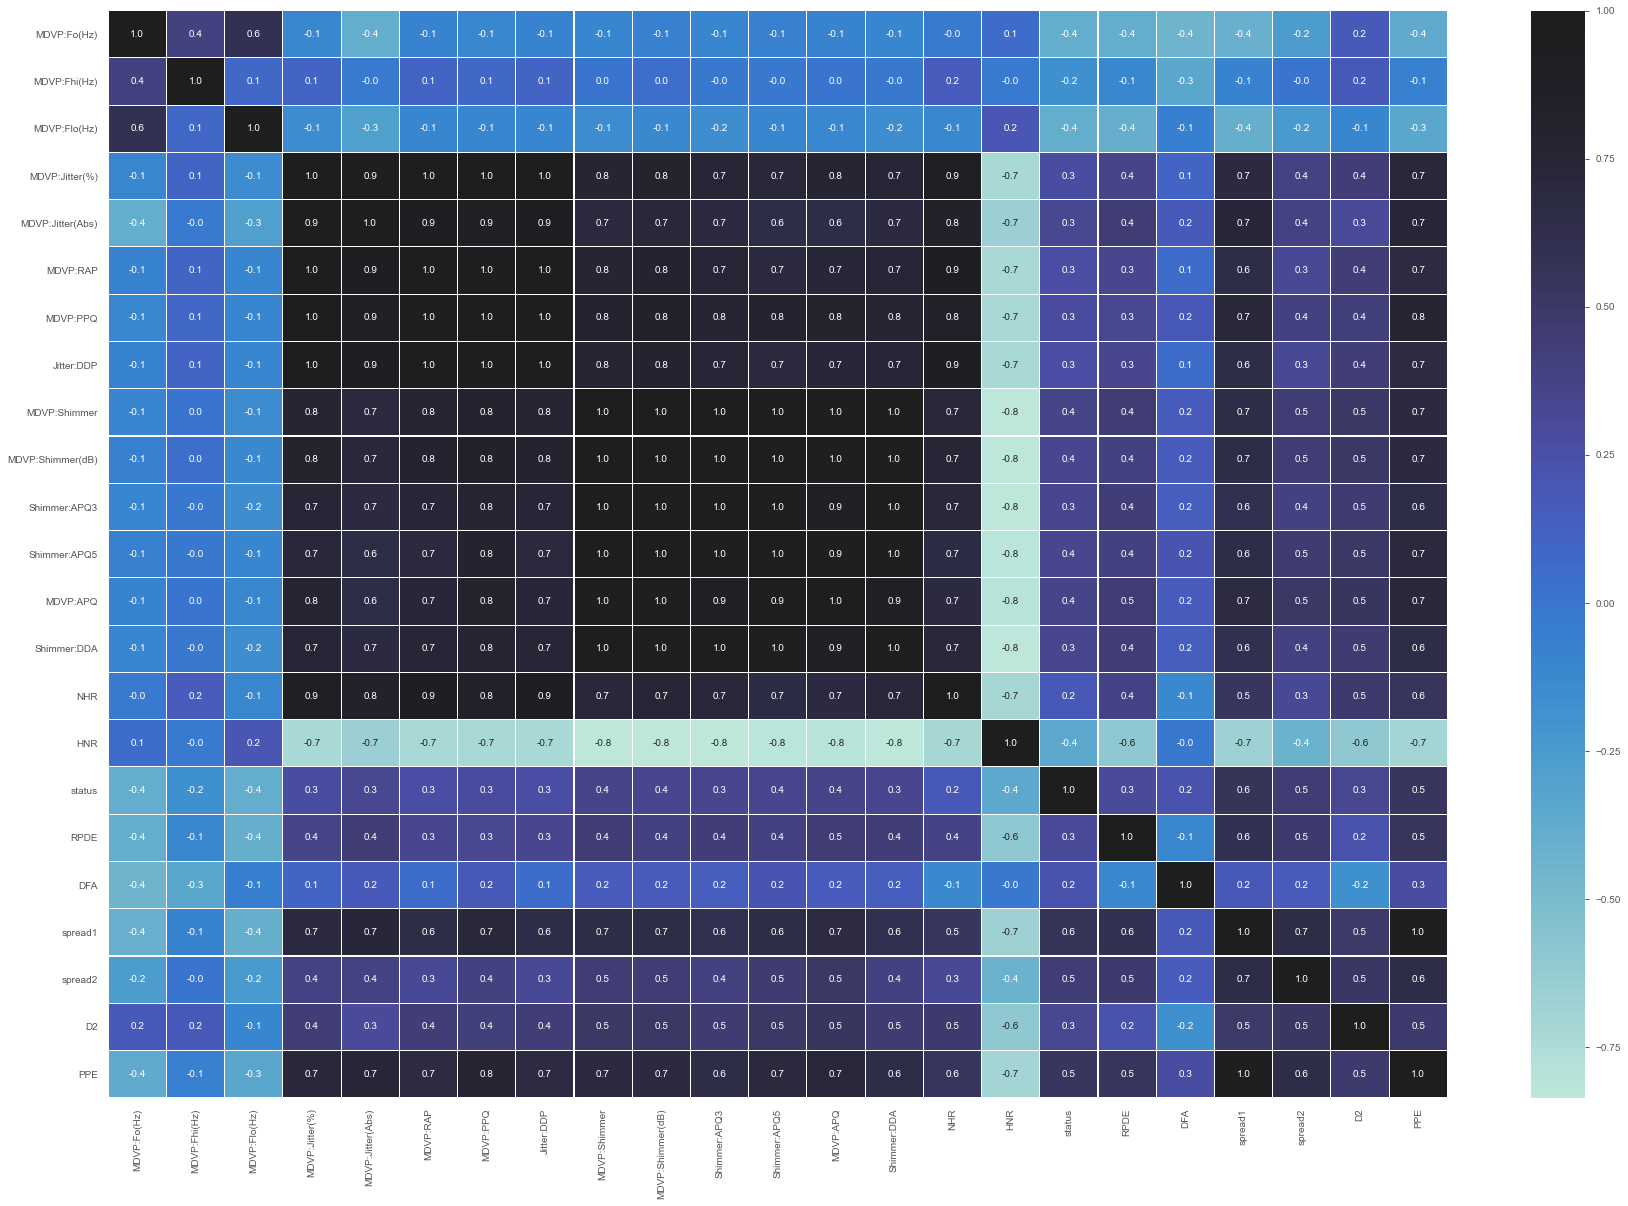

In [38]:
plt.figure(figsize=(30,20))
sns.heatmap(df.corr(), annot=True, linewidths=.1, fmt= '.1f', center = 1 )  # heatmap
plt.show()

## It's evident that a lot of the independent variables are highly correlated. To check high correlations, we highlight them on the heatmap.

In [39]:
# High correlation visualization
# Absolute values only.
cutoff = 0.9  # only datapoints with correlations higher than or equal to cutoff to be plotted.
hi_corr_df = df.drop('status', axis=1).corr()[abs(df.corr())>=cutoff].round(2)


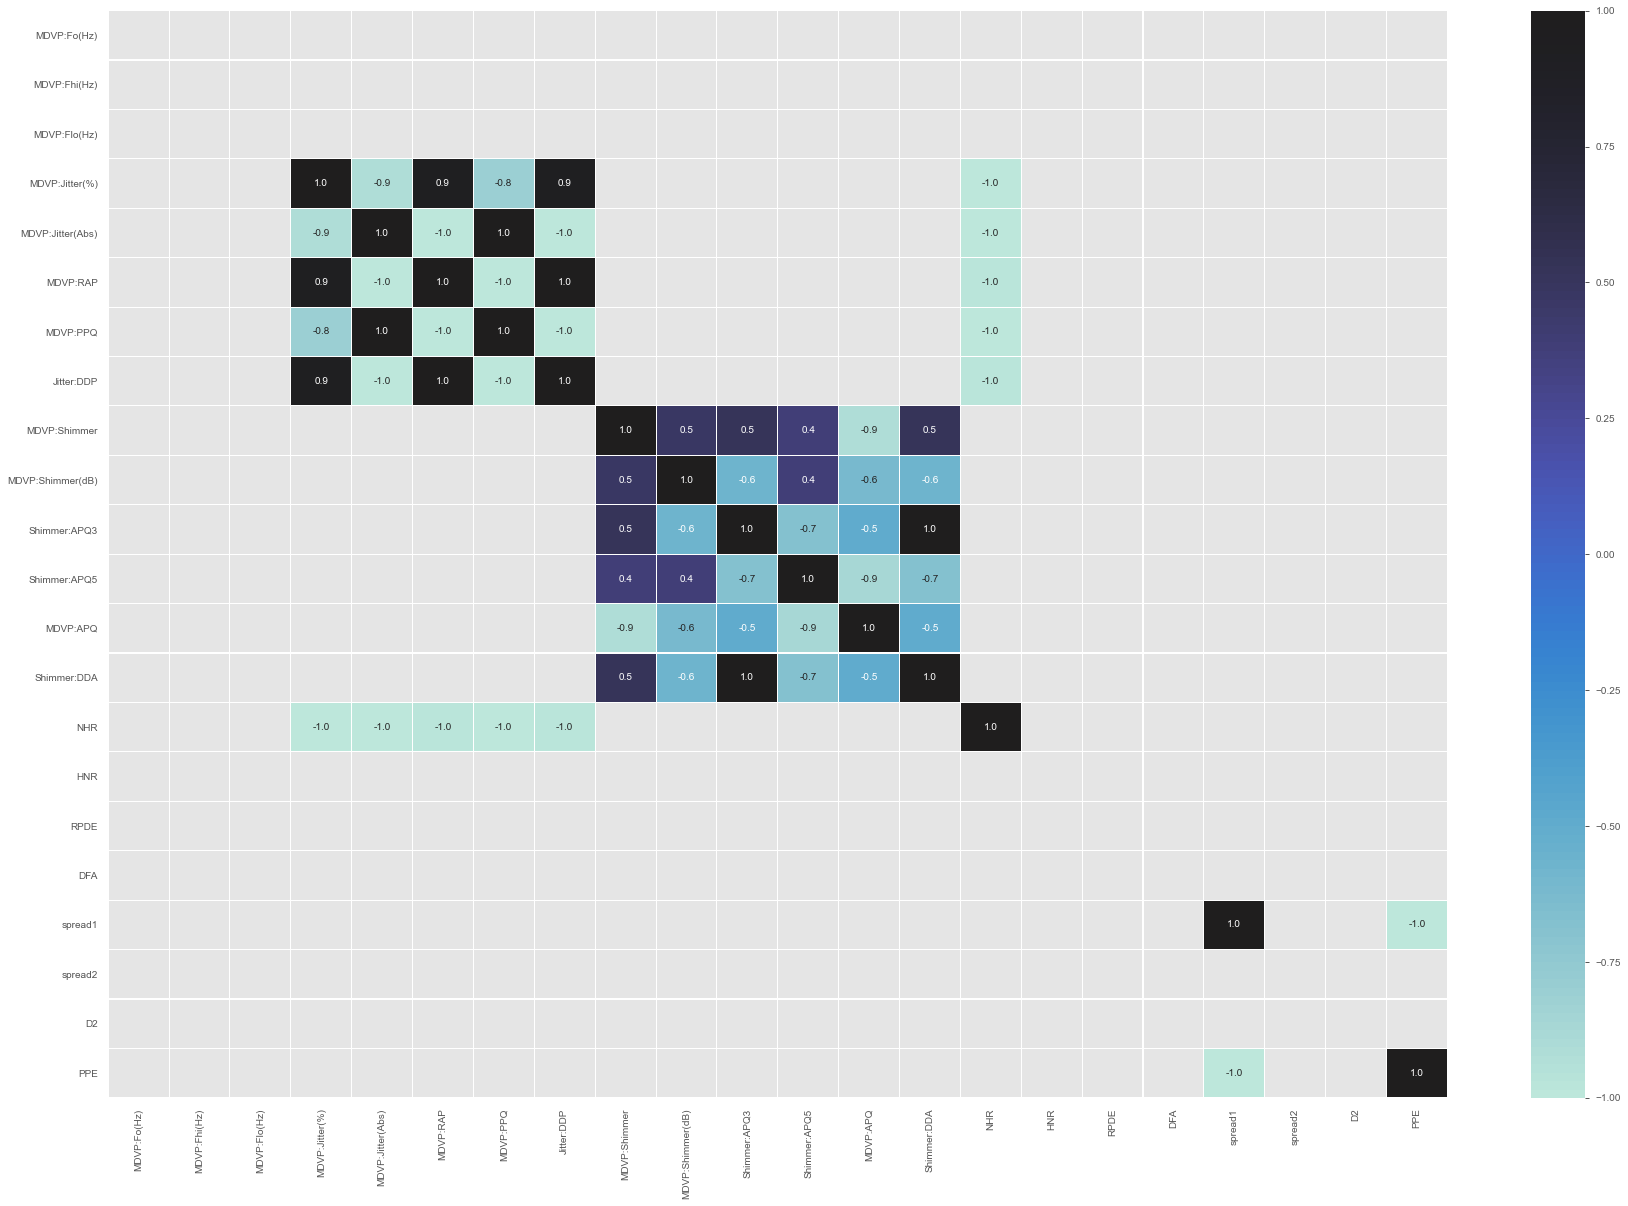

In [40]:
plt.figure(figsize=(30,20))
sns.heatmap(hi_corr_df.corr(), annot=True, linewidths=.1, fmt= '.1f', center = 1 )  # heatmap
plt.show()

The above highlighted variables have really high correlation (>0.9)

## Bi-variate analysis

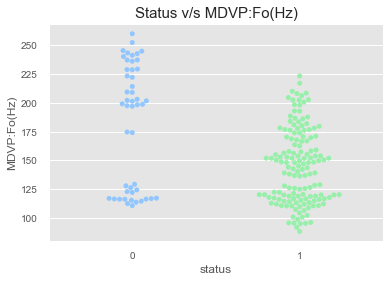

Correlation between Status and MDVP:Fo(Hz) is -0.38
___________________________________________________


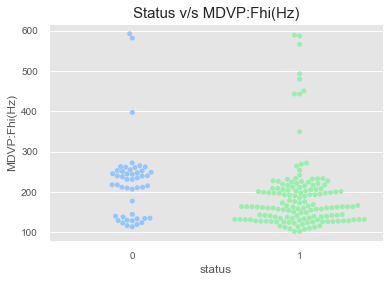

Correlation between Status and MDVP:Fhi(Hz) is -0.17
___________________________________________________


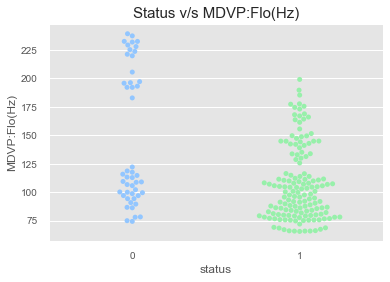

Correlation between Status and MDVP:Flo(Hz) is -0.38
___________________________________________________


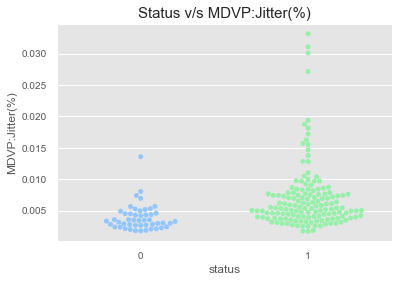

Correlation between Status and MDVP:Jitter(%) is 0.28
___________________________________________________


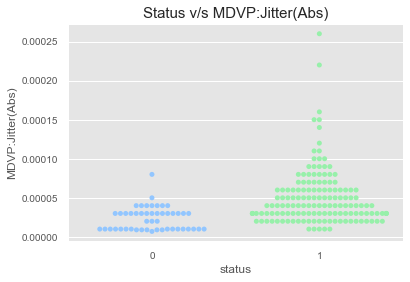

Correlation between Status and MDVP:Jitter(Abs) is 0.34
___________________________________________________


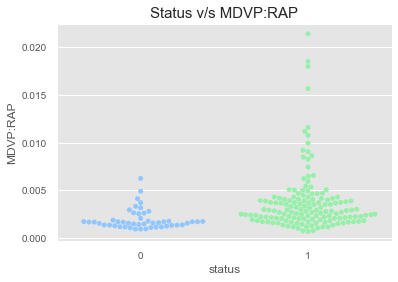

Correlation between Status and MDVP:RAP is 0.27
___________________________________________________


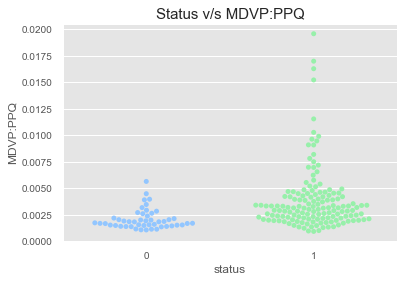

Correlation between Status and MDVP:PPQ is 0.29
___________________________________________________


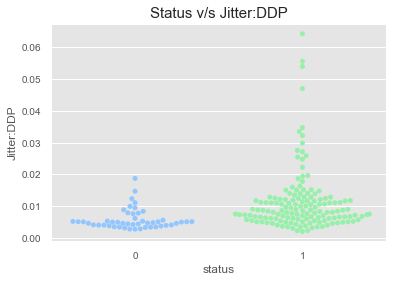

Correlation between Status and Jitter:DDP is 0.27
___________________________________________________


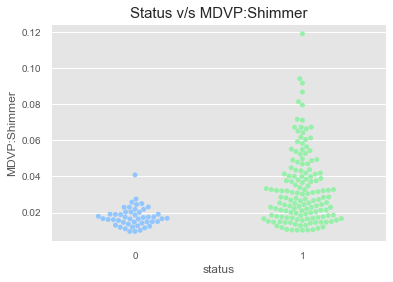

Correlation between Status and MDVP:Shimmer is 0.37
___________________________________________________


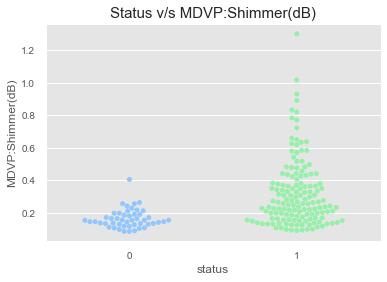

Correlation between Status and MDVP:Shimmer(dB) is 0.35
___________________________________________________


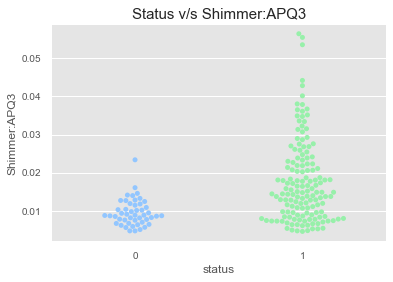

Correlation between Status and Shimmer:APQ3 is 0.35
___________________________________________________


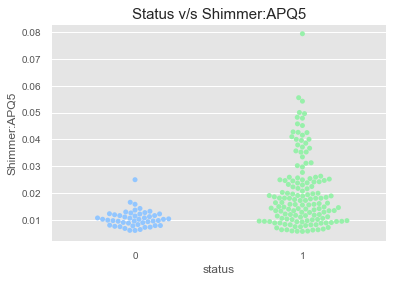

Correlation between Status and Shimmer:APQ5 is 0.35
___________________________________________________


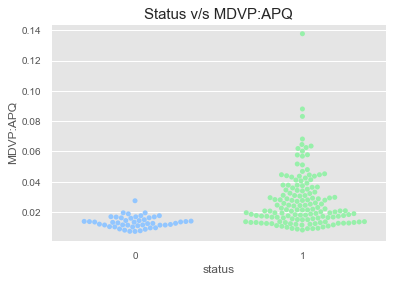

Correlation between Status and MDVP:APQ is 0.36
___________________________________________________


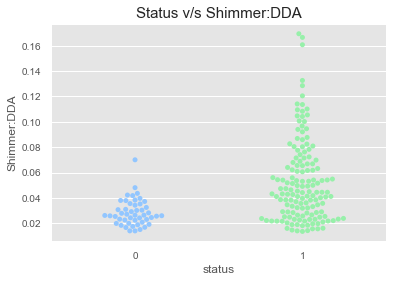

Correlation between Status and Shimmer:DDA is 0.35
___________________________________________________


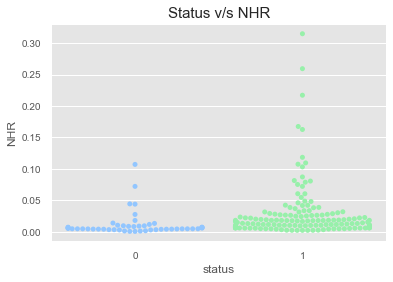

Correlation between Status and NHR is 0.19
___________________________________________________


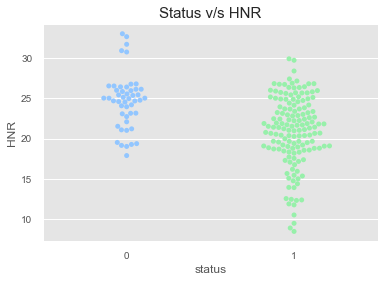

Correlation between Status and HNR is -0.36
___________________________________________________


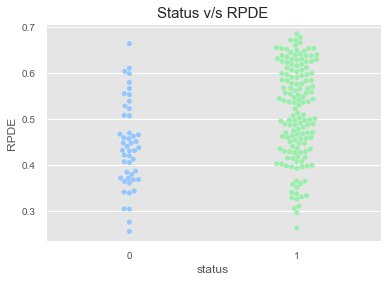

Correlation between Status and RPDE is 0.31
___________________________________________________


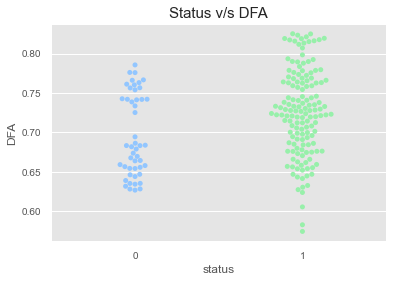

Correlation between Status and DFA is 0.23
___________________________________________________


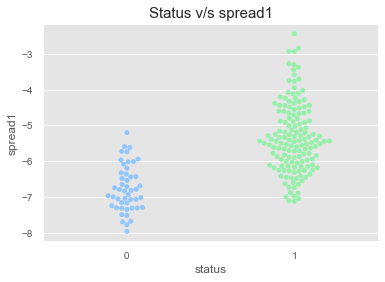

Correlation between Status and spread1 is 0.56
___________________________________________________


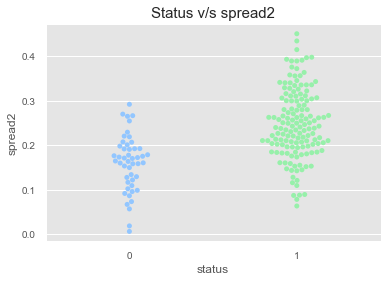

Correlation between Status and spread2 is 0.45
___________________________________________________


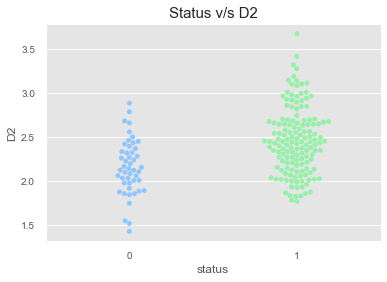

Correlation between Status and D2 is 0.34
___________________________________________________


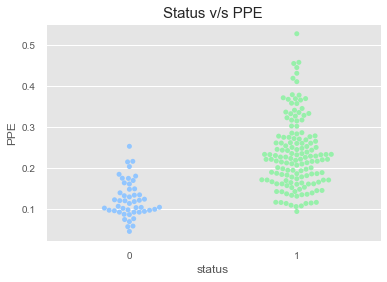

Correlation between Status and PPE is 0.53
___________________________________________________


In [41]:
for i, col in enumerate(df.drop(labels=['status'],axis=1).columns):
    plt.figure(i)
    plt.xlabel('status');
    plt.ylabel(col);
    sns.swarmplot(y=col, data=df, x="status")
    corr, _ = pearsonr(df['status'], df[col])
    plt.title(f"Status v/s {col}", fontsize=15)
    plt.show();
    print(f"Correlation between Status and {col} is {round(corr,2)}")
    print("___________________________________________________")


### There isn't much significant relationship between individual independent variables v/s the target variable. Hence, we will all 22 columns for building our model.

In [42]:
X = df.drop(labels=['status'], axis=1) #dropping target variable
X.head(10)

MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  MDVP:Jitter(Abs)  \
0      119.992       157.302        74.997         0.00784           0.00007   
1      122.400       148.650       113.819         0.00968           0.00008   
2      116.682       131.111       111.555         0.01050           0.00009   
3      116.676       137.871       111.366         0.00997           0.00009   
4      116.014       141.781       110.655         0.01284           0.00011   
5      120.552       131.162       113.787         0.00968           0.00008   
6      120.267       137.244       114.820         0.00333           0.00003   
7      107.332       113.840       104.315         0.00290           0.00003   
8       95.730       132.068        91.754         0.00551           0.00006   
9       95.056       120.103        91.226         0.00532           0.00006   

   MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  MDVP:Shimmer(dB)  ...  \
0   0.00370   0.00554     0.01109       0.04374             0.426  ...   
1   0.00465   0.00696     0.01394       0.06134             0.626  ...   
2   0.00544   0.00781     0.01633       0.05233             0.482  ...   
3   0.00502   0.00698     0.01505       0.05492             0.517  ...   
4   0.00655   0.00908     0.01966       0.06425             0.584  ...   
5   0.00463   0.00750     0.01388       0.04701             0.456  ...   
6   0.00155   0.00202     0.00466       0.01608             0.140  ...   
7   0.00144   0.00182     0.00431       0.01567             0.134  ...   
8   0.00293   0.00332     0.00880       0.02093             0.191  ...   
9   0.00268   0.00332     0.00803       0.02838             0.255  ...   

   MDVP:APQ  Shimmer:DDA      NHR     HNR      RPDE       DFA   spread1  \
0   0.02971      0.06545  0.02211  21.033  0.414783  0.815285 -4.813031   
1   0.04368      0.09403  0.01929  19.085  0.458359  0.819521 -4.075192   
2   0.03590      0.08270  0.01309  20.651  0.429895  0.825288 -4.443179   
3   0.03772      0.08771  0.01353  20.644  0.434969  0.819235 -4.117501   
4   0.04465      0.10470  0.01767  19.649  0.417356  0.823484 -3.747787   
5   0.03243      0.06985  0.01222  21.378  0.415564  0.825069 -4.242867   
6   0.01351      0.02337  0.00607  24.886  0.596040  0.764112 -5.634322   
7   0.01256      0.02487  0.00344  26.892  0.637420  0.763262 -6.167603   
8   0.01717      0.03218  0.01070  21.812  0.615551  0.773587 -5.498678   
9   0.02444      0.04324  0.01022  21.862  0.547037  0.798463 -5.011879   

    spread2        D2       PPE  
0  0.266482  2.301442  0.284654  
1  0.335590  2.486855  0.368674  
2  0.311173  2.342259  0.332634  
3  0.334147  2.405554  0.368975  
4  0.234513  2.332180  0.410335  
5  0.299111  2.187560  0.357775  
6  0.257682  1.854785  0.211756  
7  0.183721  2.064693  0.163755  
8  0.327769  2.322511  0.231571  
9  0.325996  2.432792  0.271362  

[10 rows x 22 columns]

In [43]:
y = df["status"] #target variable in y
pd.DataFrame(y).head()

status
0       1
1       1
2       1
3       1
4       1

In [44]:
#splitting in a 70:30 ratio
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0) 

#### All our numeric attributes had different ranges hence they need to be put on a uniform scale for model building.

In [45]:
#scaling the values

scaler = MinMaxScaler(feature_range=(0,1)) #scale of 0-1

In [46]:
##min-max scaling

x_train = scaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train, columns=X.columns)
x_train.head() #train values after scaling

MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  MDVP:Jitter(Abs)  \
0     0.665411      0.946334      0.650550        0.462444          0.288538   
1     0.361566      0.125123      0.461278        0.070656          0.090909   
2     0.119193      0.066365      0.217649        0.186824          0.249012   
3     0.230521      0.074726      0.271768        0.137174          0.169960   
4     0.325169      0.504433      0.100613        0.117759          0.130435   

   MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  MDVP:Shimmer(dB)  ...  \
0  0.407927  0.465628    0.407700      0.567306          0.614626  ...   
1  0.063316  0.073577    0.063466      0.145479          0.124897  ...   
2  0.132431  0.209452    0.132249      0.160822          0.139688  ...   
3  0.118898  0.119227    0.118718      0.207945          0.208710  ...   
4  0.065732  0.105263    0.065561      0.099452          0.087921  ...   

   MDVP:APQ  Shimmer:DDA       NHR       HNR      RPDE       DFA   spread1  \
0  0.439320     0.589421  0.249037  0.266114  0.389025  0.802475  0.555508   
1  0.108949     0.166902  0.017379  0.597090  0.210540  0.737186  0.308001   
2  0.102743     0.198100  0.030907  0.511542  0.646161  0.975076  0.599429   
3  0.182271     0.174284  0.082694  0.455580  0.928336  0.404703  0.445950   
4  0.103279     0.099114  0.057103  0.564578  0.720589  0.280511  0.456512   

    spread2        D2       PPE  
0  0.576308  0.747063  0.467318  
1  0.398326  0.422506  0.206214  
2  0.448617  0.283171  0.563681  
3  0.513085  0.341509  0.356440  
4  0.525619  0.422644  0.359600  

[5 rows x 22 columns]

In [47]:
x_test = scaler.transform(x_test)
x_test = pd.DataFrame(x_test, columns=X.columns)
x_test.head() #test values after scaling 

MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  MDVP:Jitter(Abs)  \
0     0.060959      0.000327      0.129945        0.082113          0.130435   
1     0.282892      0.117826      0.382943        0.037874          0.051383   
2     0.663280      0.223438      0.765904        0.001910          0.007905   
3     0.709126      0.266514      0.697108        0.114577          0.090909   
4     0.140966      0.063748      0.234183        0.057607          0.090909   

   MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  MDVP:Shimmer(dB)  ...  \
0  0.083132  0.087003    0.083280      0.115525          0.096138  ...   
1  0.020783  0.030612    0.020941      0.027489          0.022186  ...   
2  0.008700  0.005908    0.008537     -0.000365          0.000000  ...   
3  0.118898  0.098818    0.119040      0.065936          0.052588  ...   
4  0.043983  0.050483    0.044137      0.036530          0.036154  ...   

   MDVP:APQ  Shimmer:DDA       NHR       HNR      RPDE       DFA   spread1  \
0  0.063285     0.158364  0.026005  0.560961  0.742568  0.789360  0.350684   
1  0.031719     0.038773  0.016424  0.701536  0.467254  0.289093  0.256346   
2 -0.000536     0.002760  0.000223  0.985248  0.248830  0.668713  0.048681   
3  0.044055     0.078251  0.017666  0.618955  0.420983  0.589516  0.361953   
4  0.031719     0.040313  0.011777  0.731326  0.355023  0.726748  0.296776   

    spread2        D2       PPE  
0  0.161920  0.316683  0.274914  
1  0.329880  0.310491  0.194630  
2  0.387795  0.060955  0.024029  
3  0.549299  0.535533  0.276015  
4  0.478618  0.386927  0.239914  

[5 rows x 22 columns]

# Building Models
# Standard Classification Algorithms: Logistic, NaiveBayes, kNN

# 1. Logistic Regression

In [48]:
from sklearn.linear_model import LogisticRegression

# Fit the model on training set
logistic = LogisticRegression(solver="liblinear")
logistic.fit(x_train, y_train)

LogisticRegression(solver='liblinear')

In [49]:
#predict on test
y_predict = logistic.predict(x_test)

y_predict ##our predicted values on test set


array([1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1])

In [50]:
logistic_score_train = logistic.score(x_train, y_train)
print(f"Train accuracy for logistic regression is {logistic_score_train}")

logistic_score_test = logistic.score(x_test, y_test)
print(f"Test accuracy for logistic regression is {logistic_score_test}")

Train accuracy for logistic regression is 0.8455882352941176
Test accuracy for logistic regression is 0.9152542372881356


### Confusion Matrix for Logistic Regression

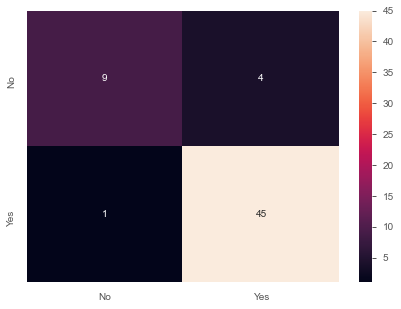

In [51]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predict, labels=[0, 1])
df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g');

In [52]:
LR_precision = precision_score(y_test, y_predict)
print(f"Logistic Regression - Precision: {LR_precision}")

LR_recall = recall_score(y_test, y_predict)
print(f"Logistic Regression - Recall: {LR_recall}")

LR_f1 = f1_score(y_test, y_predict)

print(f"Logistic Regression - F1 Score: {LR_f1}")

Logistic Regression - Precision: 0.9183673469387755
Logistic Regression - Recall: 0.9782608695652174
Logistic Regression - F1 Score: 0.9473684210526316


### Classification Report

In [53]:
print(metrics.classification_report(y_test, y_predict, labels=[1, 0]))

              precision    recall  f1-score   support

           1       0.92      0.98      0.95        46
           0       0.90      0.69      0.78        13

    accuracy                           0.92        59
   macro avg       0.91      0.84      0.86        59
weighted avg       0.91      0.92      0.91        59



### ROC curve and area under the curve for logistic regression


In [54]:
LRprob=logistic.predict_proba(x_test)
fpr1, tpr1, thresholds1 = roc_curve(y_test, LRprob[:, 1])
roc_aucLR = auc(fpr1, tpr1)
print("Area under the ROC curve : %f" % roc_aucLR)

Area under the ROC curve : 0.921405


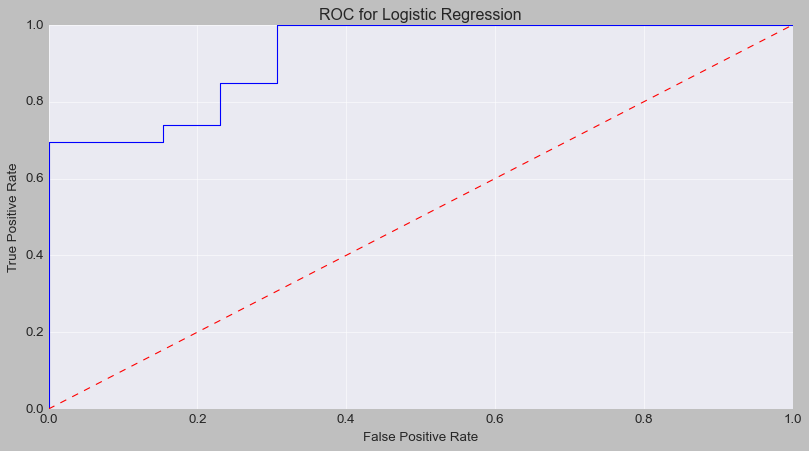

In [131]:
#ROC Curve for logistic regression

plt.figure(figsize = (12,6))
plt.style.use('seaborn-darkgrid')
plt.plot(fpr1,tpr1)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.title('ROC for Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [56]:
LR = pd.DataFrame({'Accuracy': [logistic_score_test],
                    'Precision': [LR_precision],
                    'Recall': [LR_recall],
                    'F1 Score': [LR_f1],
                    'AUC':[roc_aucLR]},index=["Logistic Regression"])

In [57]:
LR

Accuracy  Precision    Recall  F1 Score       AUC
Logistic Regression  0.915254   0.918367  0.978261  0.947368  0.921405

# 2.Naive Bayes

In [58]:
from sklearn.naive_bayes import GaussianNB # using Gaussian algorithm from Naive Bayes
from sklearn.naive_bayes import BernoulliNB # using Bernoulli algorithm from Naive Bayes

# create the model
gauss = GaussianNB()
bern = BernoulliNB()

gauss.fit(x_train, y_train)
print(f"Test Accuracy for GaussianNB: {gauss.score(x_train, y_train)}")
bern.fit(x_train, y_train)
print(f"Test Accuracy for BernoulliNB: {bern.score(x_train, y_train)}")

Test Accuracy for GaussianNB: 0.7058823529411765
Test Accuracy for BernoulliNB: 0.7573529411764706


In [59]:
y_pred_gauss = gauss.predict(x_test)
y_pred_bern = bern.predict(x_test)

test_score_NB = accuracy_score(y_test, y_pred_bern)

print(f"Test Accuracy for GaussianNB: {gauss.score(x_test, y_test)}")
print(f"Test Accuracy for BernoulliNB: {test_score_NB}")

Test Accuracy for GaussianNB: 0.6779661016949152
Test Accuracy for BernoulliNB: 0.7966101694915254


### Confusion Matrix for Naive Bayes

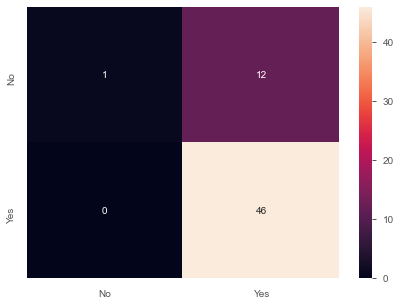

In [60]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_bern, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g');

In [61]:
NB_precision = precision_score(y_test, y_pred_bern)
print(f"Naive Bayes - Precision: {NB_precision}")

NB_recall = recall_score(y_test, y_pred_bern)
print(f"Naive Bayes - Recall: {NB_recall}")

NB_f1 = f1_score(y_test, y_pred_bern)

print(f"Naive Bayes - F1 Score: {NB_f1}")

Naive Bayes - Precision: 0.7931034482758621
Naive Bayes - Recall: 1.0
Naive Bayes - F1 Score: 0.8846153846153846


### Classification Report

In [62]:
print(metrics.classification_report(y_test, y_pred_bern, labels=[1, 0]))

              precision    recall  f1-score   support

           1       0.79      1.00      0.88        46
           0       1.00      0.08      0.14        13

    accuracy                           0.80        59
   macro avg       0.90      0.54      0.51        59
weighted avg       0.84      0.80      0.72        59



### ROC curve and area under the curve for Naive Bayes (Bernoulli)


In [63]:
NBprob=bern.predict_proba(x_test)
fpr2, tpr2, thresholds2 = roc_curve(y_test, NBprob[:, 1])
roc_aucNB = auc(fpr2, tpr2)
print("Area under the ROC curve : %f" % roc_aucNB)

Area under the ROC curve : 0.566054


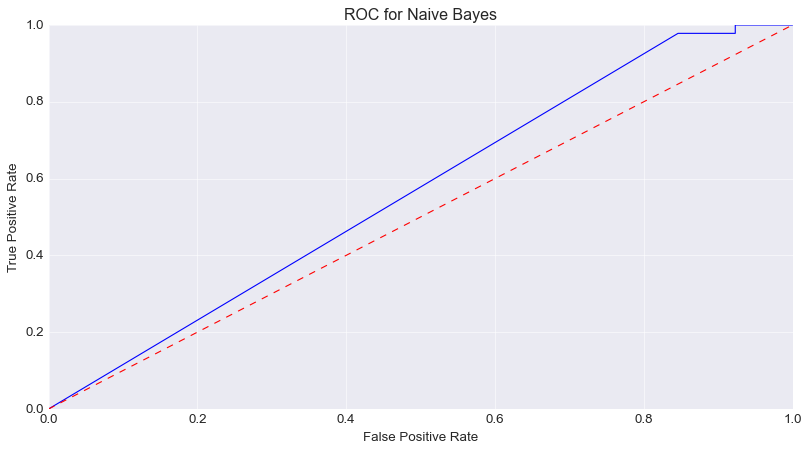

In [132]:
#ROC Curve for NB

plt.figure(figsize = (12,6))
plt.style.use('seaborn-darkgrid')
plt.plot(fpr2,tpr2)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.title('ROC for Naive Bayes')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [65]:
NB = pd.DataFrame({'Accuracy': [test_score_NB],
                    'Precision': [NB_precision],
                    'Recall': [NB_recall],
                    'F1 Score': [NB_f1],
                    'AUC':[roc_aucNB]},index=["Naive Bayes"])

In [66]:
NB

Accuracy  Precision  Recall  F1 Score       AUC
Naive Bayes   0.79661   0.793103     1.0  0.884615  0.566054

# 3. kNN Classifier

In [67]:
# instantiate learning model (k = 3)
knn = KNeighborsClassifier(n_neighbors = 3)

# fitting the model
knn.fit(x_train, y_train)

# predict the response
y_pred = knn.predict(x_test)

# evaluate accuracy
print(f"Score for k=3: {accuracy_score(y_test, y_pred)}")

# instantiate learning model (k = 5)
knn = KNeighborsClassifier(n_neighbors=5)

# fitting the model
knn.fit(x_train, y_train)

# predict the response
y_pred = knn.predict(x_test)

# evaluate accuracy
print(f"Score for k=5: {accuracy_score(y_test, y_pred)}")

# instantiate learning model (k = 9)
knn = KNeighborsClassifier(n_neighbors=9)

# fitting the model
knn.fit(x_train, y_train)

# predict the response
y_pred = knn.predict(x_test)

# evaluate accuracy
print(f"Score for k=9: {accuracy_score(y_test, y_pred)}")

knn = KNeighborsClassifier(n_neighbors = 11)

# fitting the model
knn.fit(x_train, y_train)

# predict the response
y_pred = knn.predict(x_test)

# evaluate accuracy
print(f"Score for k=11: {accuracy_score(y_test, y_pred)}")

Score for k=3: 0.9322033898305084
Score for k=5: 0.8983050847457628
Score for k=9: 0.9491525423728814
Score for k=11: 0.8983050847457628


In [68]:
knn = KNeighborsClassifier(n_neighbors = 9)

# fitting the model
knn.fit(x_train, y_train)
train_score_knn = knn.score(x_train, y_train)
print(f"Train Score for KNN: {train_score_knn}")


# predict the response
y_pred = knn.predict(x_test)
test_score_knn = knn.score(x_test, y_test)


# evaluate test accuracy
print(f"Test Score for KNN: {test_score_knn}")

Train Score for KNN: 0.9338235294117647
Test Score for KNN: 0.9491525423728814


Accuracy of 94.9% of test set

### Confusion Matrix

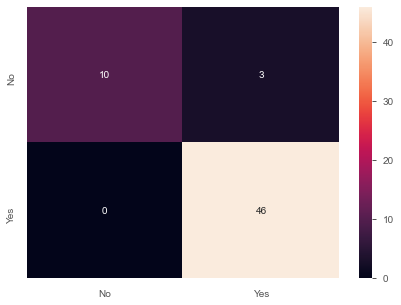

In [69]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g');

In [70]:
knn_precision = precision_score(y_test, y_pred)
print(f"kNN - Precision: {knn_precision}")

knn_recall = recall_score(y_test, y_pred)
print(f"kNN - Recall: {knn_recall}")

knn_f1 = f1_score(y_test, y_pred)
print(f"kNN - F1 Score: {knn_f1}")

kNN - Precision: 0.9387755102040817
kNN - Recall: 1.0
kNN - F1 Score: 0.968421052631579


### Classification Report

In [71]:
print(metrics.classification_report(y_test, y_pred, labels=[1, 0]))

              precision    recall  f1-score   support

           1       0.94      1.00      0.97        46
           0       1.00      0.77      0.87        13

    accuracy                           0.95        59
   macro avg       0.97      0.88      0.92        59
weighted avg       0.95      0.95      0.95        59



In [72]:
# ROC curve and area under the curve for kNN
knnprob=knn.predict_proba(x_test)
fpr3, tpr3, thresholds4 = roc_curve(y_test, knnprob[:, 1])
roc_aucknn = auc(fpr3, tpr3)
print("Area under the ROC curve : %f" % roc_aucknn)

Area under the ROC curve : 0.978261


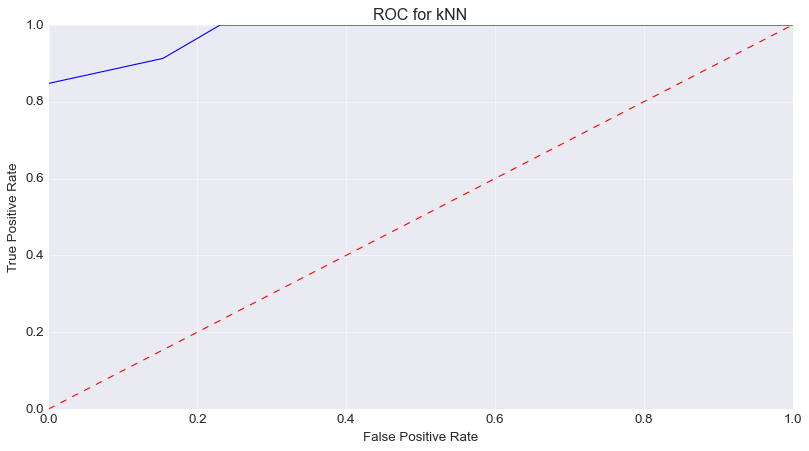

In [133]:
#ROC Curve for kNN

plt.figure(figsize = (12,6))
plt.style.use('seaborn-darkgrid')
plt.plot(fpr3,tpr3)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.title('ROC for kNN')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [74]:
knn = pd.DataFrame({'Accuracy': [test_score_knn],
                    'Precision': [knn_precision],
                    'Recall': [knn_recall],
                    'F1 Score': [knn_f1],
                    'AUC':[roc_aucknn]},index=["kNN"])

In [75]:
knn

Accuracy  Precision  Recall  F1 Score       AUC
kNN  0.949153   0.938776     1.0  0.968421  0.978261

# Ensemble Models: Random Forest, Bagging Classifier, XGBoost

# 4. Random Forest

In [76]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 50, random_state=1,max_features=12)
rfcl = rfcl.fit(x_train, y_train)

In [77]:
y_pred = rfcl.predict(x_test)
test_Score_RF = rfcl.score(x_test, y_test)
print(f"Random Forest Test score: {test_Score_RF}")

Random Forest Test score: 0.9491525423728814


### Confusion Matrix

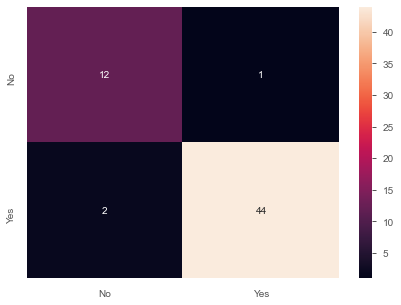

In [78]:
cm=confusion_matrix(y_test, y_pred,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

In [79]:
RF_precision = precision_score(y_test, y_pred)
print(f"Random Forest - Precision: {RF_precision}")

RF_recall = recall_score(y_test, y_pred)
print(f"Random Forest - Recall: {RF_recall}")

RF_f1 = f1_score(y_test, y_pred)
print(f"Random Forest - F1 Score: {RF_f1}")

Random Forest - Precision: 0.9777777777777777
Random Forest - Recall: 0.9565217391304348
Random Forest - F1 Score: 0.967032967032967


### Classification Report

In [80]:
print(metrics.classification_report(y_test, y_pred, labels=[1, 0]))

              precision    recall  f1-score   support

           1       0.98      0.96      0.97        46
           0       0.86      0.92      0.89        13

    accuracy                           0.95        59
   macro avg       0.92      0.94      0.93        59
weighted avg       0.95      0.95      0.95        59



In [81]:
# ROC curve and area under the curve for RandomForest
RFprob=rfcl.predict_proba(x_test)
fpr4, tpr4, thresholds4 = roc_curve(y_test, RFprob[:, 1])
roc_aucRF = auc(fpr4, tpr4)
print("Area under the ROC curve : %f" % roc_aucRF)

Area under the ROC curve : 0.988294


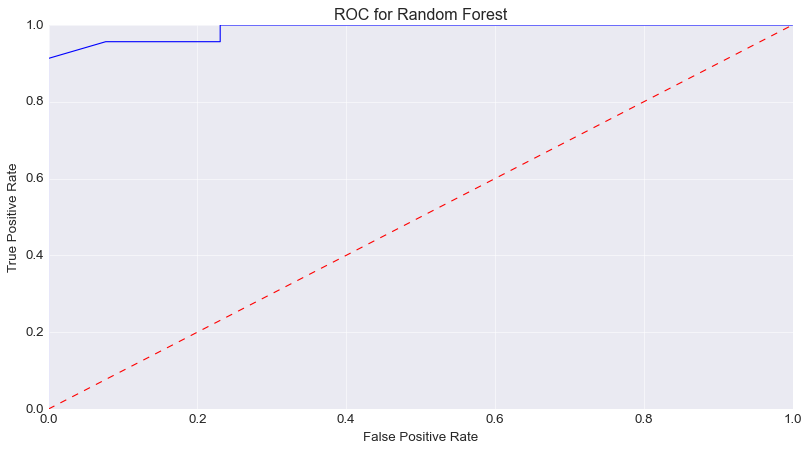

In [134]:
#ROC Curve for RandomForest

plt.figure(figsize = (12,6))
plt.style.use('seaborn-darkgrid')
plt.plot(fpr4,tpr4)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.title('ROC for Random Forest')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [83]:
RF = pd.DataFrame({'Accuracy': [test_Score_RF],
                    'Precision': [RF_precision],
                    'Recall': [RF_recall],
                    'F1 Score': [RF_f1],
                    'AUC':[roc_aucRF]},index=["Random Forest"])

In [84]:
RF

Accuracy  Precision    Recall  F1 Score       AUC
Random Forest  0.949153   0.977778  0.956522  0.967033  0.988294

# 5. Bagging Classifier

In [85]:
from sklearn.ensemble import BaggingClassifier

bgcl = BaggingClassifier(n_estimators=50,random_state=1)

bgcl = bgcl.fit(x_train, y_train)

In [86]:
y_pred = bgcl.predict(x_test)
BC_test_score = bgcl.score(x_test , y_test)
print(f"The score on test data for Bagging is {BC_test_score}")

The score on test data for Bagging is 0.9491525423728814


### Confusion Matrix

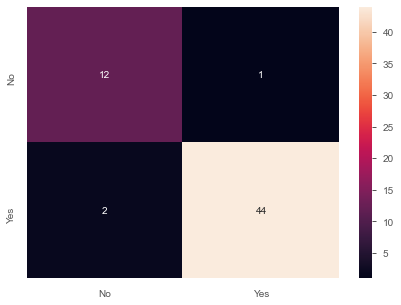

In [87]:
cm=confusion_matrix(y_test, y_pred,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g');

In [88]:
BC_precision = precision_score(y_test, y_pred)
print(f"Bagging Classifier - Precision: {BC_precision}")

BC_recall = recall_score(y_test, y_pred)
print(f"Bagging Classifier - Recall: {BC_recall}")

BC_f1 = f1_score(y_test, y_pred)
print(f"Bagging Classifier - F1 Score: {BC_f1}")

Bagging Classifier - Precision: 0.9777777777777777
Bagging Classifier - Recall: 0.9565217391304348
Bagging Classifier - F1 Score: 0.967032967032967


### Classification Report

In [89]:
print(metrics.classification_report(y_test,y_pred,labels=[0,1]))

              precision    recall  f1-score   support

           0       0.86      0.92      0.89        13
           1       0.98      0.96      0.97        46

    accuracy                           0.95        59
   macro avg       0.92      0.94      0.93        59
weighted avg       0.95      0.95      0.95        59



In [90]:
# ROC curve and area under the curve for BaggingClassifier
baggingcl=bgcl.predict_proba(x_test)
fpr5, tpr5, thresholds5 = roc_curve(y_test, baggingcl[:, 1])
roc_aucBC = auc(fpr5, tpr5)
print("Area under the ROC curve : %f" % roc_aucBC)

Area under the ROC curve : 0.987458


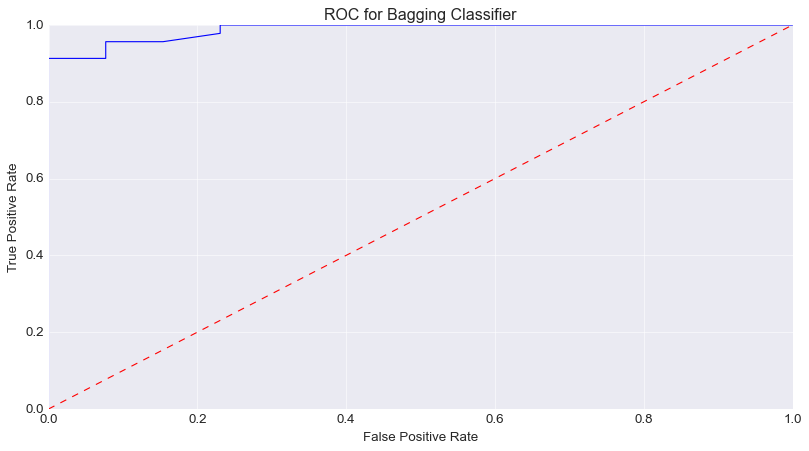

In [135]:
#ROC Curve for BaggingClassifier

plt.figure(figsize = (12,6))
plt.style.use('seaborn-darkgrid')
plt.plot(fpr5,tpr5)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.title('ROC for Bagging Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [92]:
BC = pd.DataFrame({'Accuracy': [BC_test_score],
                    'Precision': [BC_precision],
                    'Recall': [BC_recall],
                    'F1 Score': [BC_f1],
                    'AUC':[roc_aucBC]},index=["Bagging Classifier"])

In [93]:
BC

Accuracy  Precision    Recall  F1 Score       AUC
Bagging Classifier  0.949153   0.977778  0.956522  0.967033  0.987458

# 6. XGBoost

In [94]:
xgboost = XGBClassifier()
xgboost.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [95]:
y_pred = xgboost.predict(x_test)
y_pred

array([1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1])

In [96]:
xgboost_score_test = xgboost.score(x_test, y_test)
print(f"Test score for xgboost is {xgboost_score_test}")

Test score for xgboost is 0.9661016949152542


In [97]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      1.00      0.93        13
           1       1.00      0.96      0.98        46

    accuracy                           0.97        59
   macro avg       0.93      0.98      0.95        59
weighted avg       0.97      0.97      0.97        59



### Confusion Matrix

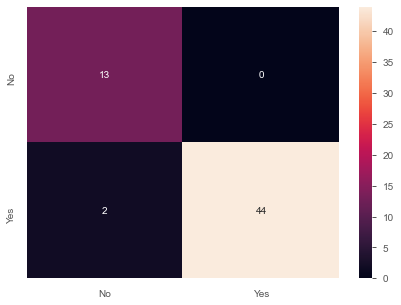

In [98]:
cm=confusion_matrix(y_test, y_pred,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g');

In [99]:
xgb_precision = precision_score(y_test, y_pred)
print(f"XGBoost - Precision: {xgb_precision}")

xgb_recall = recall_score(y_test, y_pred)
print(f"XGBoost - Recall: {xgb_recall}")

xgb_f1 = f1_score(y_test, y_pred)
print(f"XGBoost - F1 Score: {xgb_f1}")

XGBoost - Precision: 1.0
XGBoost - Recall: 0.9565217391304348
XGBoost - F1 Score: 0.9777777777777777


### Classification Report

In [100]:
print(metrics.classification_report(y_test,y_pred,labels=[0,1]))

              precision    recall  f1-score   support

           0       0.87      1.00      0.93        13
           1       1.00      0.96      0.98        46

    accuracy                           0.97        59
   macro avg       0.93      0.98      0.95        59
weighted avg       0.97      0.97      0.97        59



In [101]:
# ROC curve and area under the curve for XGBoost
xgboostProb=xgboost.predict_proba(x_test)
fpr6, tpr6, thresholds6 = roc_curve(y_test, xgboostProb[:, 1])
roc_aucxgb = auc(fpr6, tpr6)
print("Area under the ROC curve : %f" % roc_aucxgb)

Area under the ROC curve : 0.989967


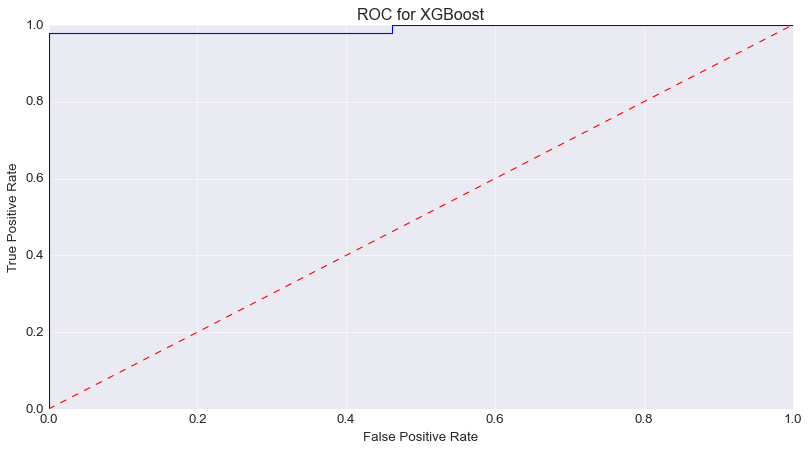

In [136]:
#ROC Curve for XGBoost

plt.figure(figsize = (12,6))
plt.style.use('seaborn-darkgrid')
plt.plot(fpr6,tpr6)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.title('ROC for XGBoost')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [103]:
xgb = pd.DataFrame({'Accuracy': [xgboost_score_test],
                    'Precision': [xgb_precision],
                    'Recall': [xgb_recall],
                    'F1 Score': [xgb_f1],
                    'AUC':[roc_aucxgb]},index=["XGBoost"])

In [104]:
xgb

Accuracy  Precision    Recall  F1 Score       AUC
XGBoost  0.966102        1.0  0.956522  0.977778  0.989967

# Meta-Classifier

# 7. Stacking 

In [105]:
from mlxtend.classifier import StackingClassifier

In [106]:
clf1 = KNeighborsClassifier(n_neighbors=1)
clf2 = LogisticRegression() # RandomForestClassifier(random_state=1)
clf3 = BernoulliNB()
clf4 = RandomForestClassifier(random_state=1)

In [107]:
rf = RandomForestClassifier(random_state=1)

In [108]:
sclf = StackingClassifier(classifiers=[clf1, clf2, clf3, clf4], meta_classifier = rf)

In [109]:
for clf, label in zip([clf1, clf2, clf3, clf4, sclf], ['KNN', 'LR', 'Naive Bayes', 'RF',
                                                 'StackingClassifier']):
    scores = cross_val_score(clf, x_train, y_train, cv=15, scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]"  % (scores.mean(), scores.std(), label))

Accuracy: 0.96 (+/- 0.05) [KNN]
Accuracy: 0.82 (+/- 0.09) [LR]
Accuracy: 0.74 (+/- 0.05) [Naive Bayes]
Accuracy: 0.90 (+/- 0.08) [RF]
Accuracy: 0.96 (+/- 0.05) [StackingClassifier]


In [110]:
sclf.fit(x_train,y_train)

StackingClassifier(classifiers=[KNeighborsClassifier(n_neighbors=1),
                                LogisticRegression(), BernoulliNB(),
                                RandomForestClassifier(random_state=1)],
                   meta_classifier=RandomForestClassifier(random_state=1))

In [111]:
y_pred = sclf.predict(x_test)
y_pred

array([1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1])

In [112]:
sclf_score_test = sclf.score(x_test,y_test)
print(f"Test score for stacking classifier is {sclf_score_test}")

Test score for stacking classifier is 0.9491525423728814


In [113]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      1.00      0.90        13
           1       1.00      0.93      0.97        46

    accuracy                           0.95        59
   macro avg       0.91      0.97      0.93        59
weighted avg       0.96      0.95      0.95        59



### Confusion Matrix

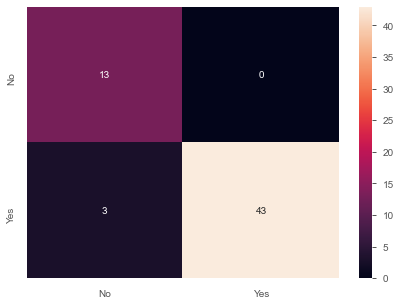

In [114]:
cm=confusion_matrix(y_test, y_pred,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g');

In [115]:
sclf_precision = precision_score(y_test, y_pred)
print(f"Stacking Classifier - Precision: {sclf_precision}")

sclf_recall = recall_score(y_test, y_pred)
print(f"Stacking Classifier - Recall: {sclf_recall}")

sclf_f1 = f1_score(y_test, y_pred)
print(f"Stacking Classifier - F1 Score: {sclf_f1}")

Stacking Classifier - Precision: 1.0
Stacking Classifier - Recall: 0.9347826086956522
Stacking Classifier - F1 Score: 0.9662921348314606


### Classification Report

In [116]:
print(metrics.classification_report(y_test,y_pred,labels=[0,1]))

              precision    recall  f1-score   support

           0       0.81      1.00      0.90        13
           1       1.00      0.93      0.97        46

    accuracy                           0.95        59
   macro avg       0.91      0.97      0.93        59
weighted avg       0.96      0.95      0.95        59



In [117]:
# ROC curve and area under the curve for StackingClassifier
stackProb=sclf.predict_proba(x_test)
fpr7, tpr7, thresholds7 = roc_curve(y_test, stackProb[:, 1])
roc_aucsc = auc(fpr7, tpr7)
print("Area under the ROC curve : %f" % roc_aucsc)

Area under the ROC curve : 0.984114


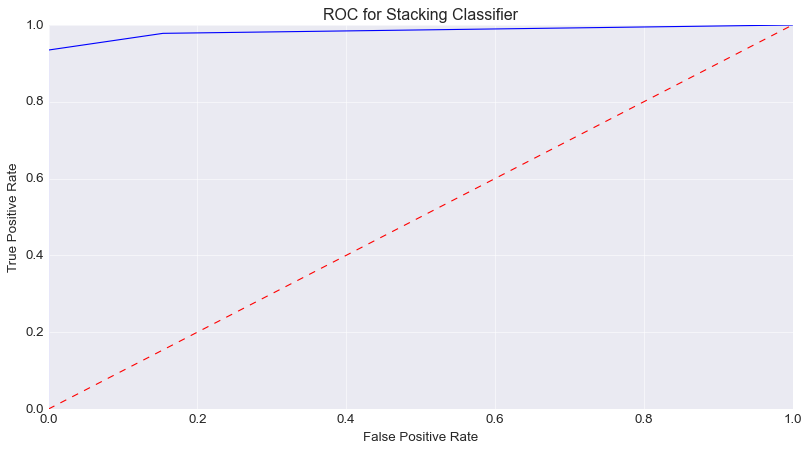

In [137]:
#ROC Curve for StackingClassifier

plt.figure(figsize = (12,6))
plt.style.use('seaborn-darkgrid')
plt.plot(fpr7,tpr7)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.title('ROC for Stacking Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [138]:
sc = pd.DataFrame({'Accuracy': [sclf_score_test],
                    'Precision': [sclf_precision],
                    'Recall': [sclf_recall],
                    'F1 Score': [sclf_f1],
                    'AUC':[roc_aucsc]},index=["Stacking Classifier"])

In [139]:
sc

Accuracy  Precision    Recall  F1 Score       AUC
Stacking Classifier  0.949153        1.0  0.934783  0.966292  0.984114

In [140]:
models = [LR, NB, knn, RF, BC, xgb, sc]
model = pd.concat(models)

In [141]:
model_names = ['Logistic', 'NaiveBayes', 'kNN', 'RandomForest' , 'BaggingClassifier', 'XGBoost', 'StackingClassifier']

## Comparing models

In [142]:
model

Accuracy  Precision    Recall  F1 Score       AUC
Logistic Regression  0.915254   0.918367  0.978261  0.947368  0.921405
Naive Bayes          0.796610   0.793103  1.000000  0.884615  0.566054
kNN                  0.949153   0.938776  1.000000  0.968421  0.978261
Random Forest        0.949153   0.977778  0.956522  0.967033  0.988294
Bagging Classifier   0.949153   0.977778  0.956522  0.967033  0.987458
XGBoost              0.966102   1.000000  0.956522  0.977778  0.989967
Stacking Classifier  0.949153   1.000000  0.934783  0.966292  0.984114

## It is evident that XGBoost has the highest accuracy and the maximum F1 Score. The plot to visualize the following data: 

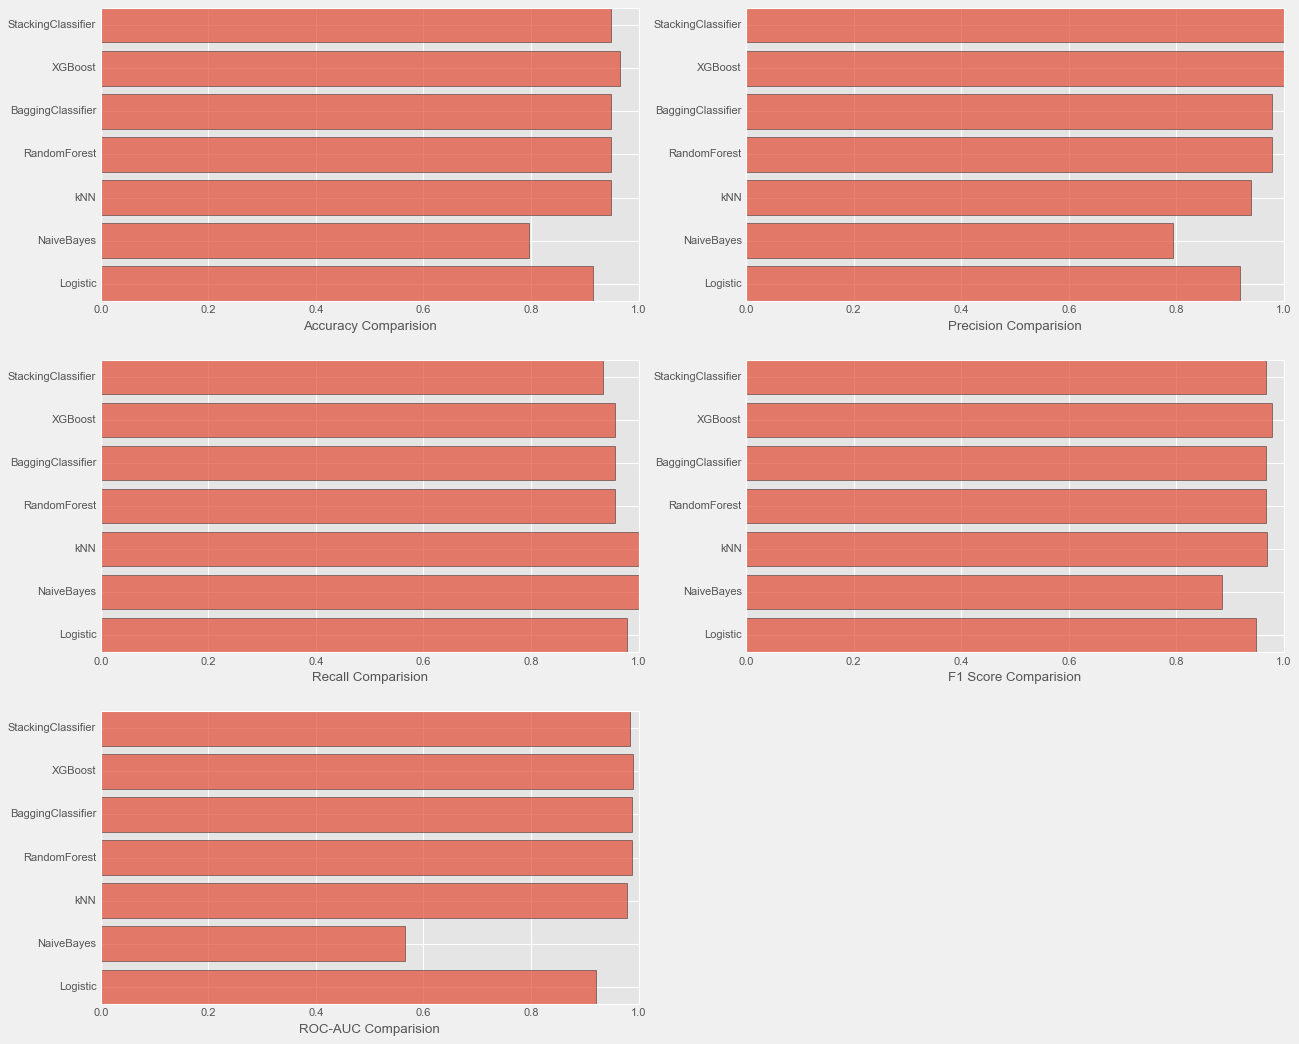

In [146]:
#plot to view above metrics

plt.figure(figsize= (17,15))
plt.style.use("ggplot")


plt.subplot(3,2,1)
plt.barh(model_names,model['Accuracy'], edgecolor = 'black', alpha = 0.7)
plt.xlabel('Accuracy Comparision')

plt.subplot(3,2,2)
plt.barh(model_names,model['Precision'], edgecolor = 'black', alpha = 0.7)
plt.xlabel('Precision Comparision')

plt.subplot(3,2,3)
plt.barh(model_names,model['Recall'], edgecolor = 'black', alpha = 0.7)
plt.xlabel('Recall Comparision')

plt.subplot(3,2,4)
plt.barh(model_names,model['F1 Score'], edgecolor = 'black', alpha = 0.7)
plt.xlabel('F1 Score Comparision')

plt.subplot(3,2,5)
plt.barh(model_names,model['AUC'], edgecolor = 'black', alpha = 0.7)
plt.xlabel('ROC-AUC Comparision')


plt.show()

### XGBoost has the highest accuracy and F1 score(0.966, 0.977 respectively) followed by Stacking Classifier,kNN, Bagging Classifier and Random Forest with accuracy of 0.949153. Among the models that came 2nd after XGBoost, kNN with 9 neighbours has the highest F1 score of 0.968421. All the models have performed very well, and give us a very high accuracy of identifying if a person has Parkinson's disease based on their vocal features. 

# So for this problem, XGBoost is the perfect classification algorithm.